In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

In [2]:
import degSummary
from scanpyColor import godsnot_102

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=600)
sc._settings.ScanpyConfig(max_memory=50, n_jobs=50)

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.11.4 pandas==2.2.1 scikit-learn==1.5.1 statsmodels==0.14.2 python-igraph==0.11.6 louvain==0.8.0 pynndescent==0.5.12


In [4]:
sns.set_theme(style="ticks")

# Load data

In [5]:
os.chdir('../..')

In [6]:
pwd

'/data/tcl/Project/ADFCA'

In [7]:
age_L=['10', '20', '30']
ageColor_L=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
ageColor_L2=['#009ACD', '#FF7D40', '#2CA02C', '#D62728']
ggplotColor3_L= ["#F8766D", "#00BA38", "#619CFF"]
set2Color_L=["#66C2A5", "#E9936A", "#A89BB0"]

In [8]:
genotype_L=['control', 'AB42', 'hTau']

In [9]:
figureDataFolder=f'Analysis/Figure'
os.makedirs(figureDataFolder, exist_ok=True)
figure1Folder=f'{figureDataFolder}/Figure1'
os.makedirs(figure1Folder, exist_ok=True)
figure1PicFolder=f'{figure1Folder}/pic'
os.makedirs(figure1PicFolder, exist_ok=True)

In [10]:
genoAge_L = ['control_10', 'control_20', 'control_30', 'AB42_10', 'AB42_20', 'hTau_20', 'hTau_30']

In [11]:
genoAgeSex_L = ['control_10_female', 'control_20_female', 'control_30_female', 'control_10_male', 'control_20_male', 'control_30_male', 
                'AB42_10_female', 'AB42_20_female', 'AB42_10_male', 'AB42_20_male', 
                'hTau_20_female', 'hTau_30_female', 'hTau_20_male', 'hTau_30_male']

In [12]:
annotBroadFolder='Analysis/7.broadAnnot'

# Fig. 1F: Broad annotations

## Merged data

### HVG to tsne

In [13]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [14]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [15]:
adata_headBody

AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

extracting highly variable genes
    finished (0:00:18)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


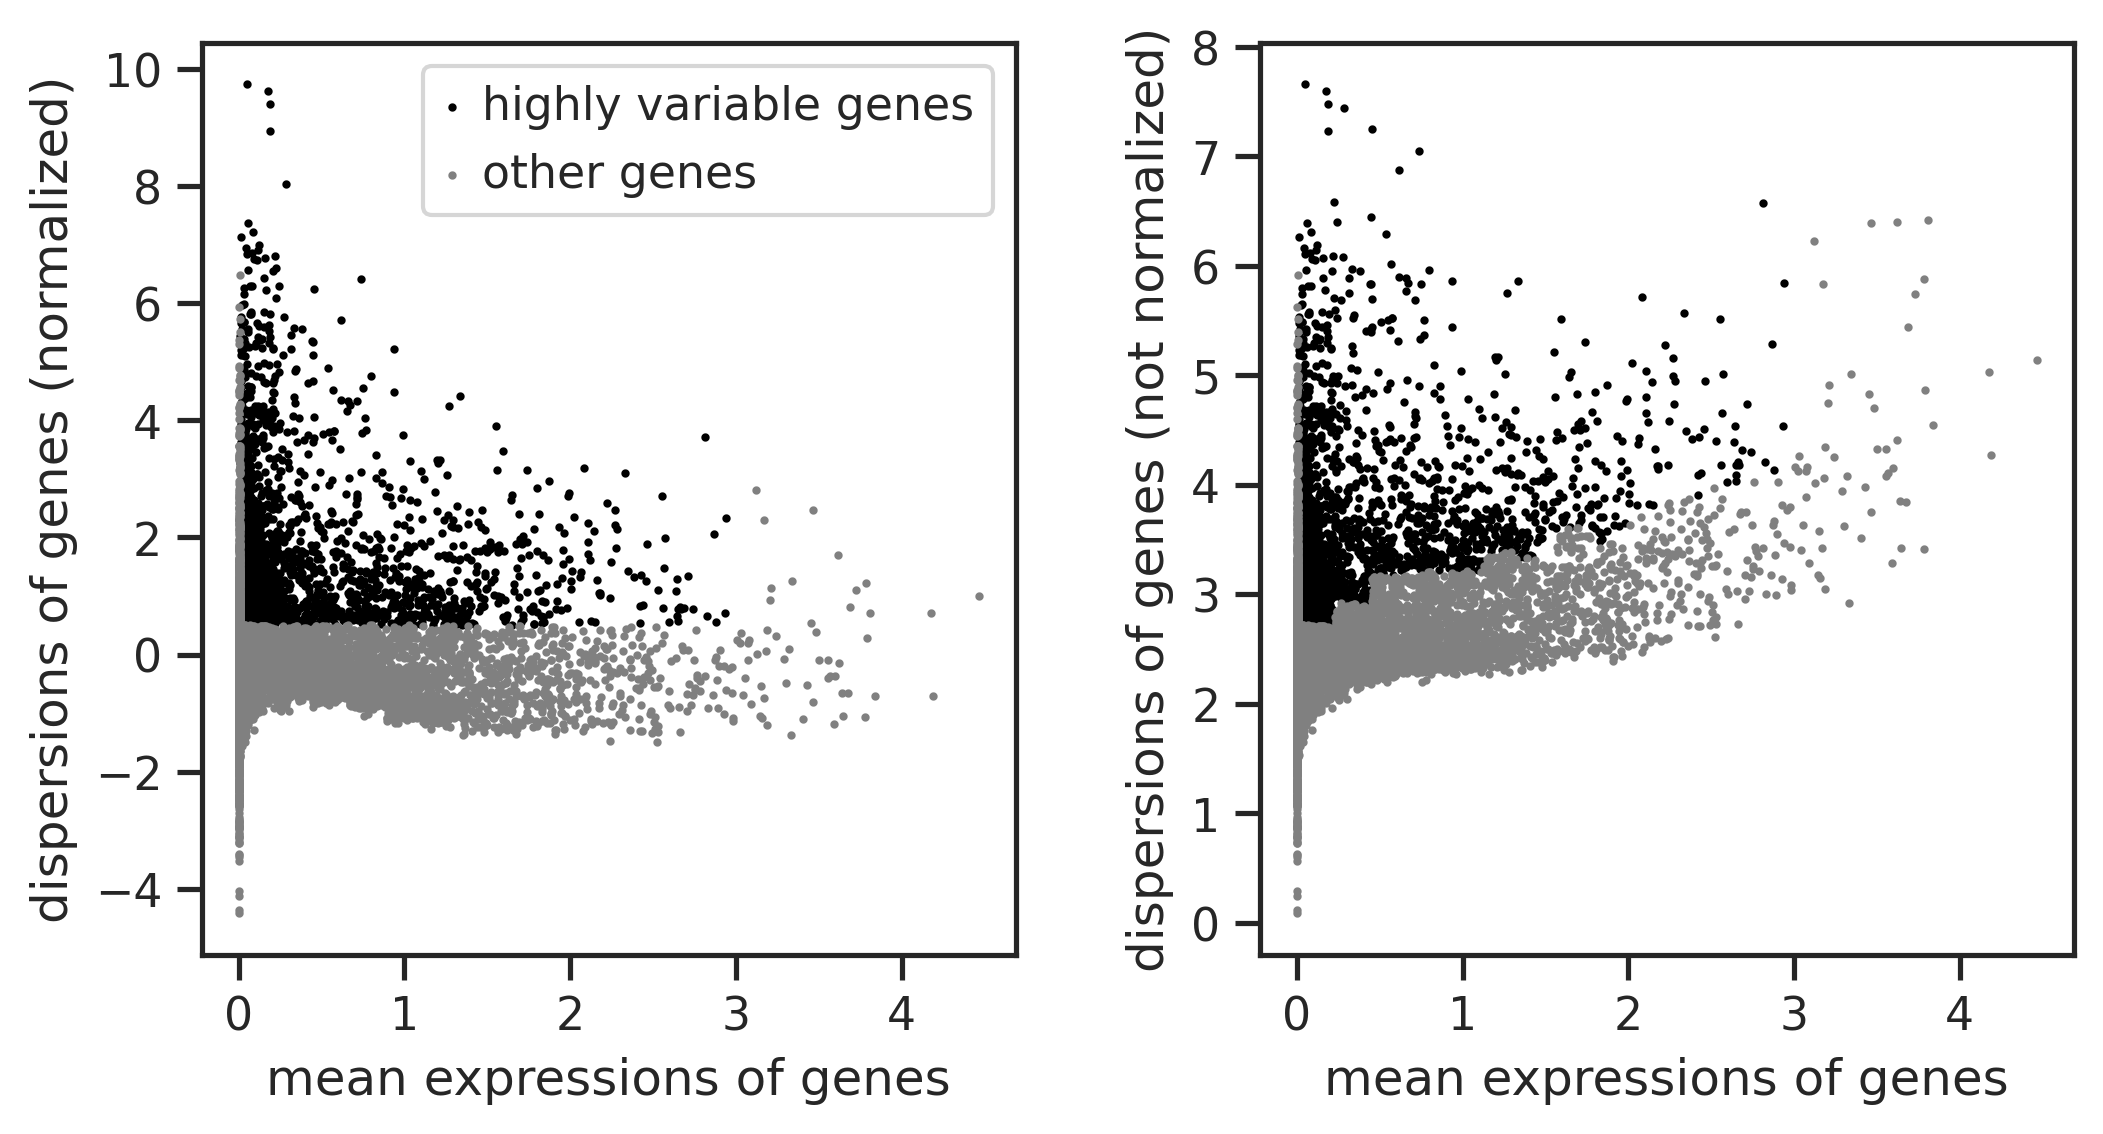

False    14165
True      2054
Name: highly_variable, dtype: int64

In [16]:
# HVG
sc.pp.highly_variable_genes(adata_headBody, min_mean=0.01, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_headBody)
adata_headBody.var['highly_variable'].value_counts()

In [17]:
adata_headBody.raw = adata_headBody
adata_headBody = adata_headBody[:, adata_headBody.var.highly_variable]

# sc.pp.regress_out(adata_headBody, ['total_counts'], n_jobs=50)
sc.pp.scale(adata_headBody, max_value=10)

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [18]:
adata_headBody

AnnData object with n_obs × n_vars = 624458 × 2054
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

computing PCA
    on highly variable genes
    with n_comps=150
    finished (0:02:14)


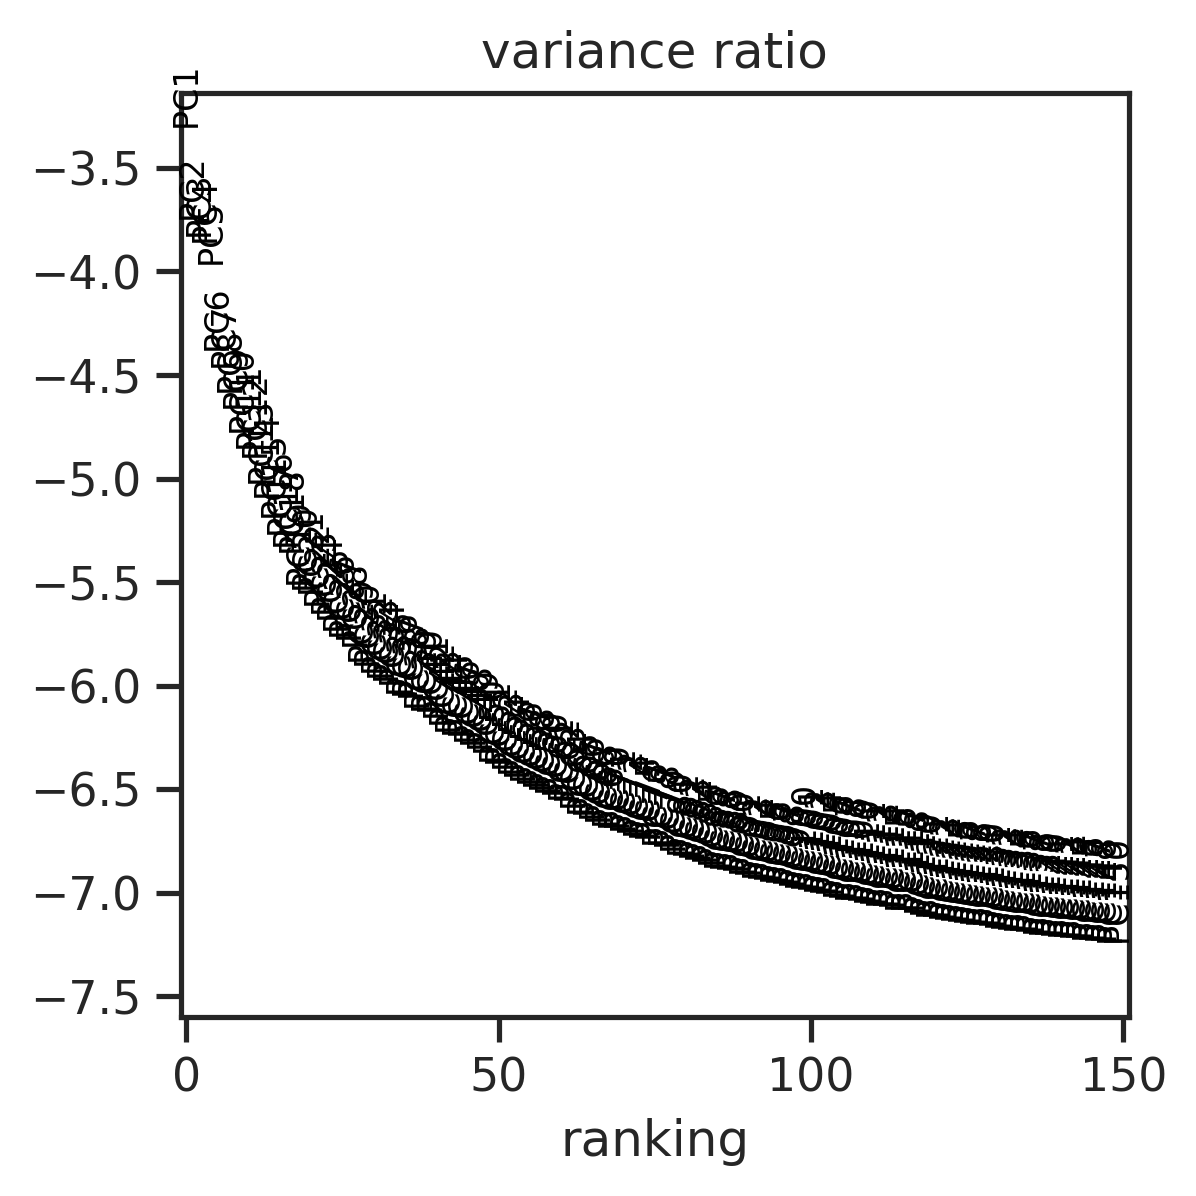

In [19]:
# PCA
sc.tl.pca(adata_headBody, svd_solver='arpack', n_comps=150)
sc.pl.pca_variance_ratio(adata_headBody, log=True, n_pcs=150)

In [20]:
# nn
sc.pp.neighbors(adata_headBody, n_neighbors=15, n_pcs= 50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:22)


In [21]:
sc.tl.tsne(adata_headBody, n_jobs=50, n_pcs=50)
sc.tl.umap(adata_headBody)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:19:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:10:59)


In [22]:
sc.tl.leiden(adata_headBody)

running Leiden clustering


IOStream.flush timed out


    finished: found 64 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:04:58)


In [23]:
adata_headBody.write(f'{figure1Folder}/adata_headBody_HVG_to_tsne.h5ad')

### Plot broad annotation

In [24]:
adata_headBody=sc.read(f'{figure1Folder}/adata_headBody_HVG_to_tsne.h5ad')

In [25]:
# import random

In [26]:
adata_headBody.uns.keys()

dict_keys(['hvg', 'leiden', 'neighbors', 'pca', 'tsne', 'umap'])

In [27]:
color_L1 = ['#9edae5', '#d62728', '#17becf', '#dbdb8d', '#ff9896', '#8c564b', '#7f7f7f', '#98df8a', '#c49c94', '#e377c2', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4',
           '#c7c7c7', '#c5b0d5', '#f7b6d2', '#9467bd', '#bcbd22','#aec7e8']

In [28]:
color_L2 = ['#dbdb8d', '#c5b0d5', '#f7b6d2', '#ffbb78', '#c49c94', '#1f77b4', '#ff7f0e', '#ff9896', '#7f7f7f', '#98df8a', '#aec7e8', '#8c564b', '#9467bd', '#2ca02c',
 '#d62728', '#bcbd22', '#e377c2', '#9edae5', '#17becf', '#c7c7c7']

In [29]:
adata_headBody.obs.adfca_annotation_broad.cat.categories

Index(['CNS neuron', 'PNS neuron', 'cardial cell', 'epithelial cell',
       'excretory system', 'fat cell', 'female germline cell',
       'female reproductive system', 'gland', 'glial cell', 'gut cell',
       'hemocyte', 'male germline cell', 'male reproductive system',
       'muscle cell', 'oenocyte', 'sensory neuron', 'tracheal cell',
       'unannotated'],
      dtype='object')

In [30]:
len(adata_headBody.obs.adfca_annotation_broad.cat.categories)

19

In [31]:
len(color_L1)

20

In [32]:
broadColor1_D = dict(zip(adata_headBody.obs.adfca_annotation_broad.cat.categories, color_L1))
broadColor2_D = dict(zip(adata_headBody.obs.adfca_annotation_broad.cat.categories, color_L2))

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


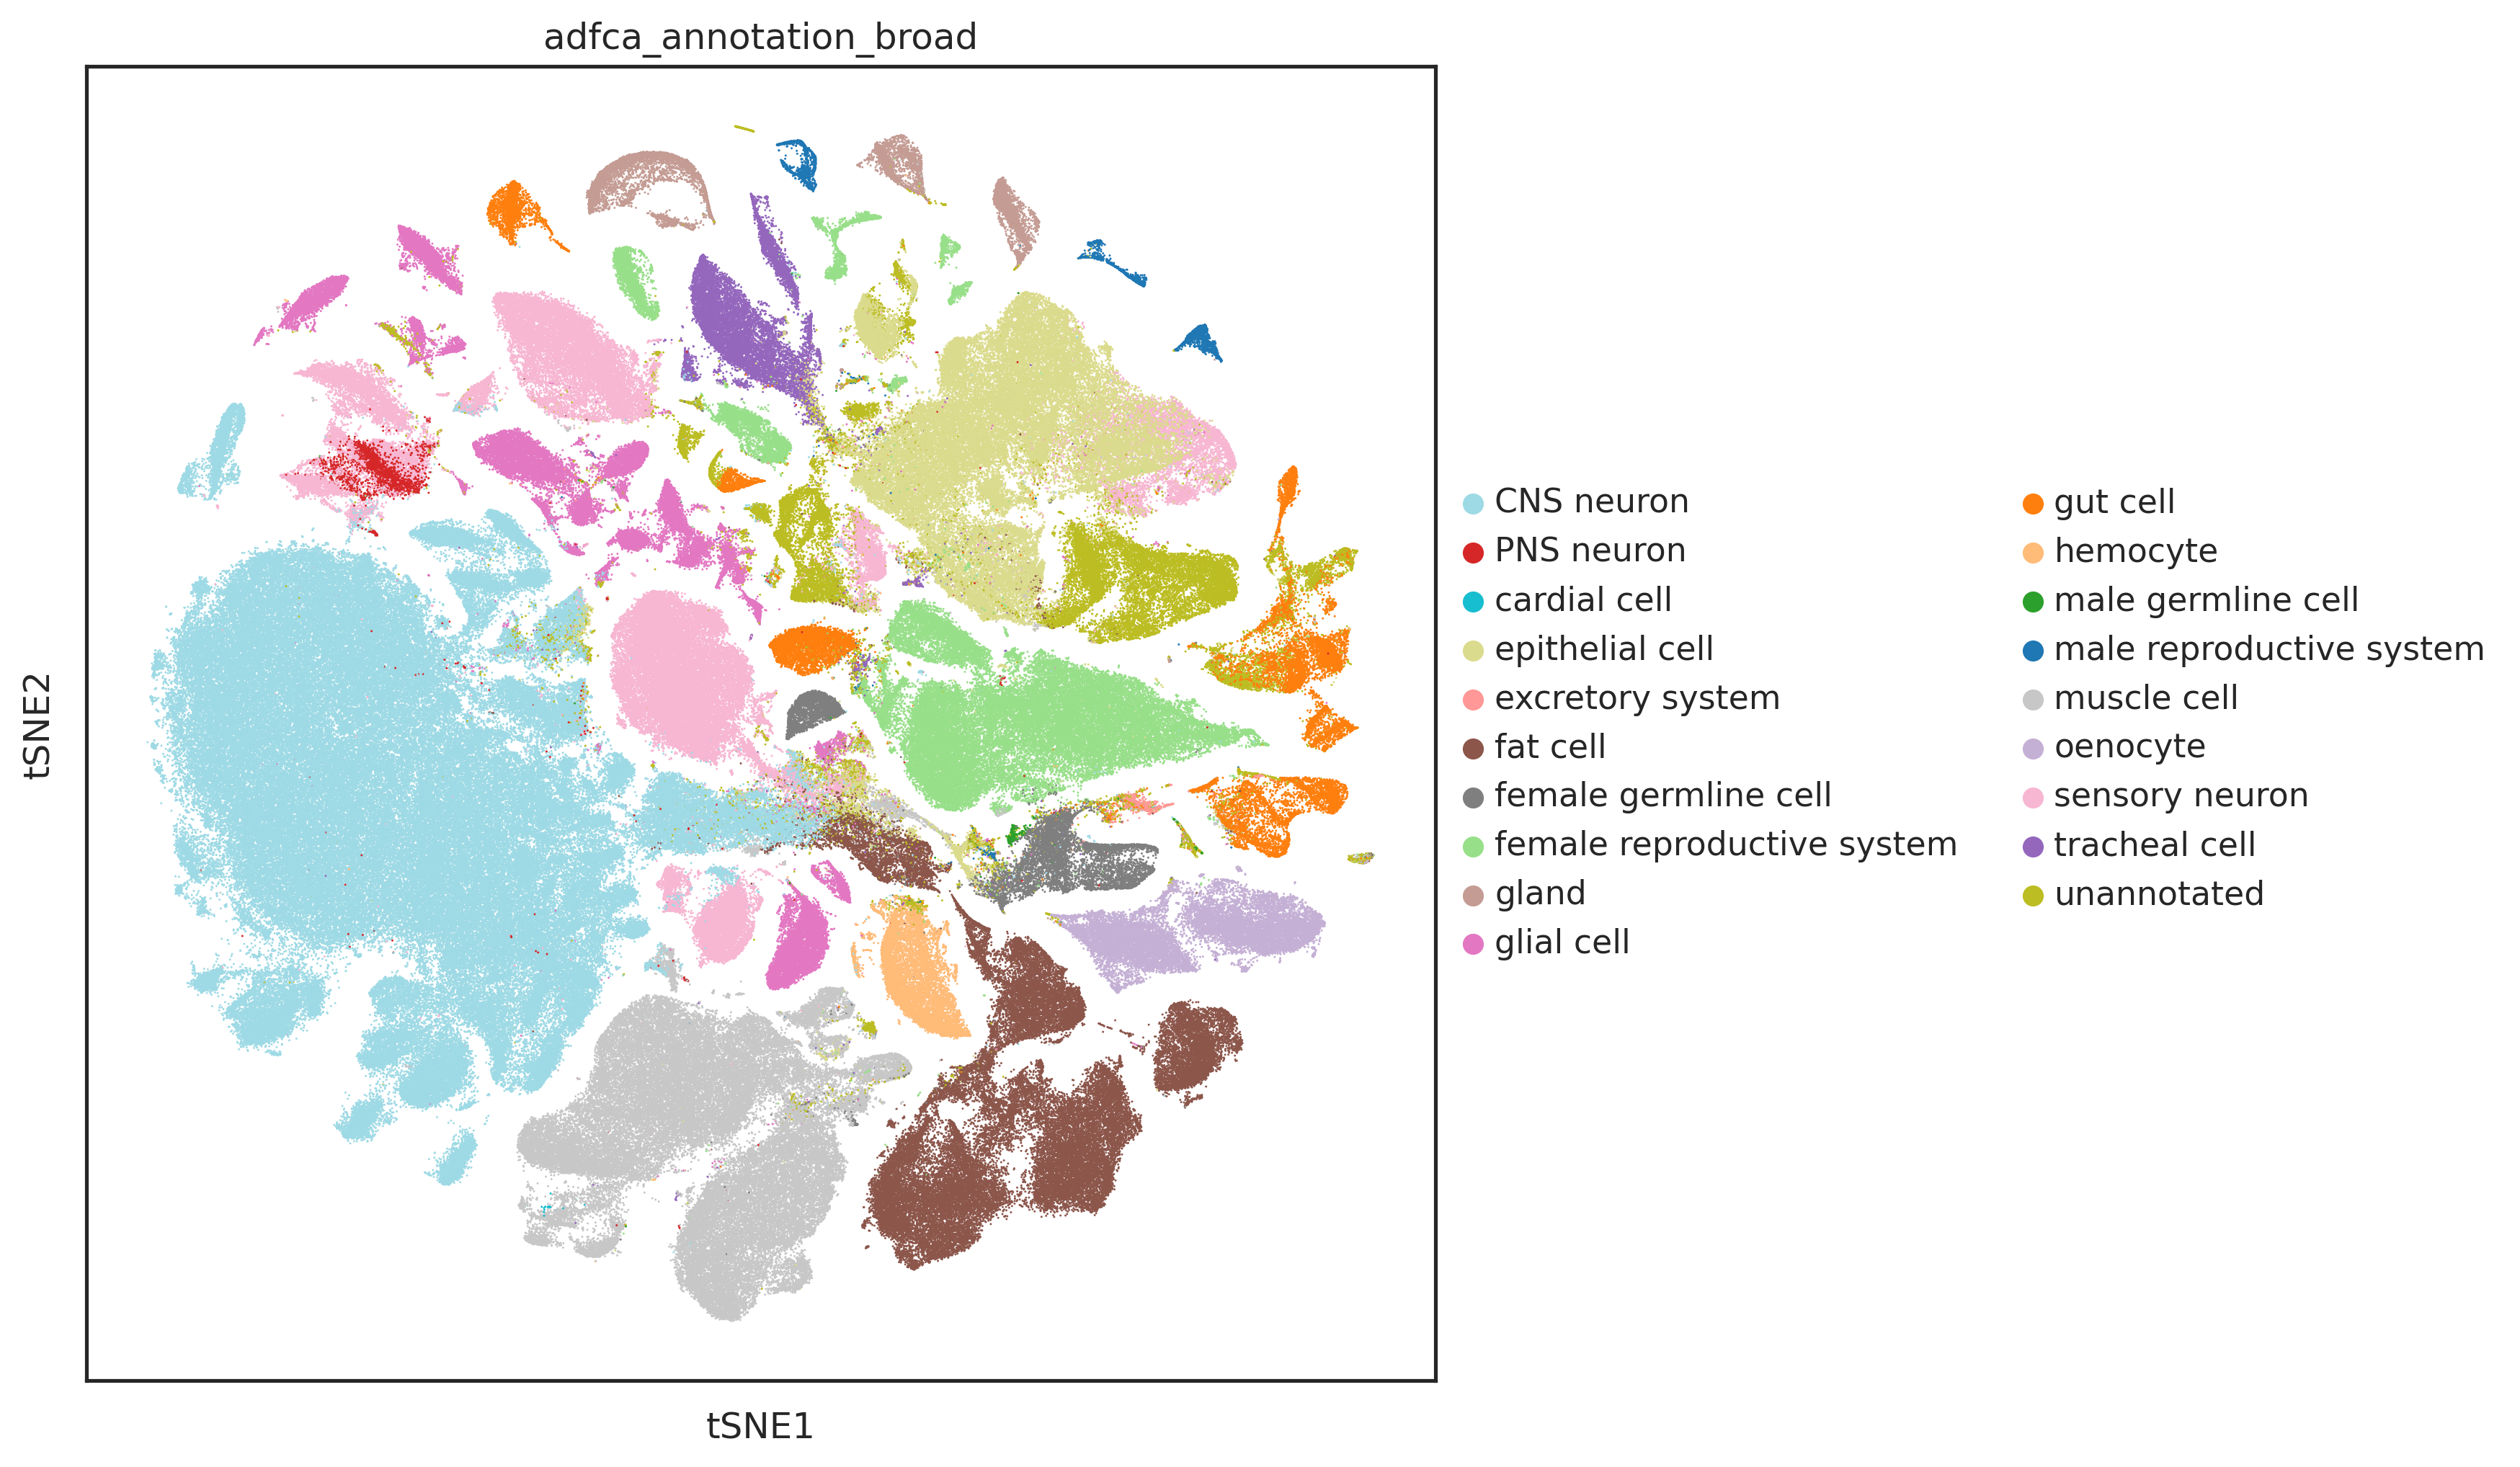

In [33]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='adfca_annotation_broad', size=2, palette=color_L1, # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               save=f'_adata_headBody_adfca_annotation_broad1_20230930.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


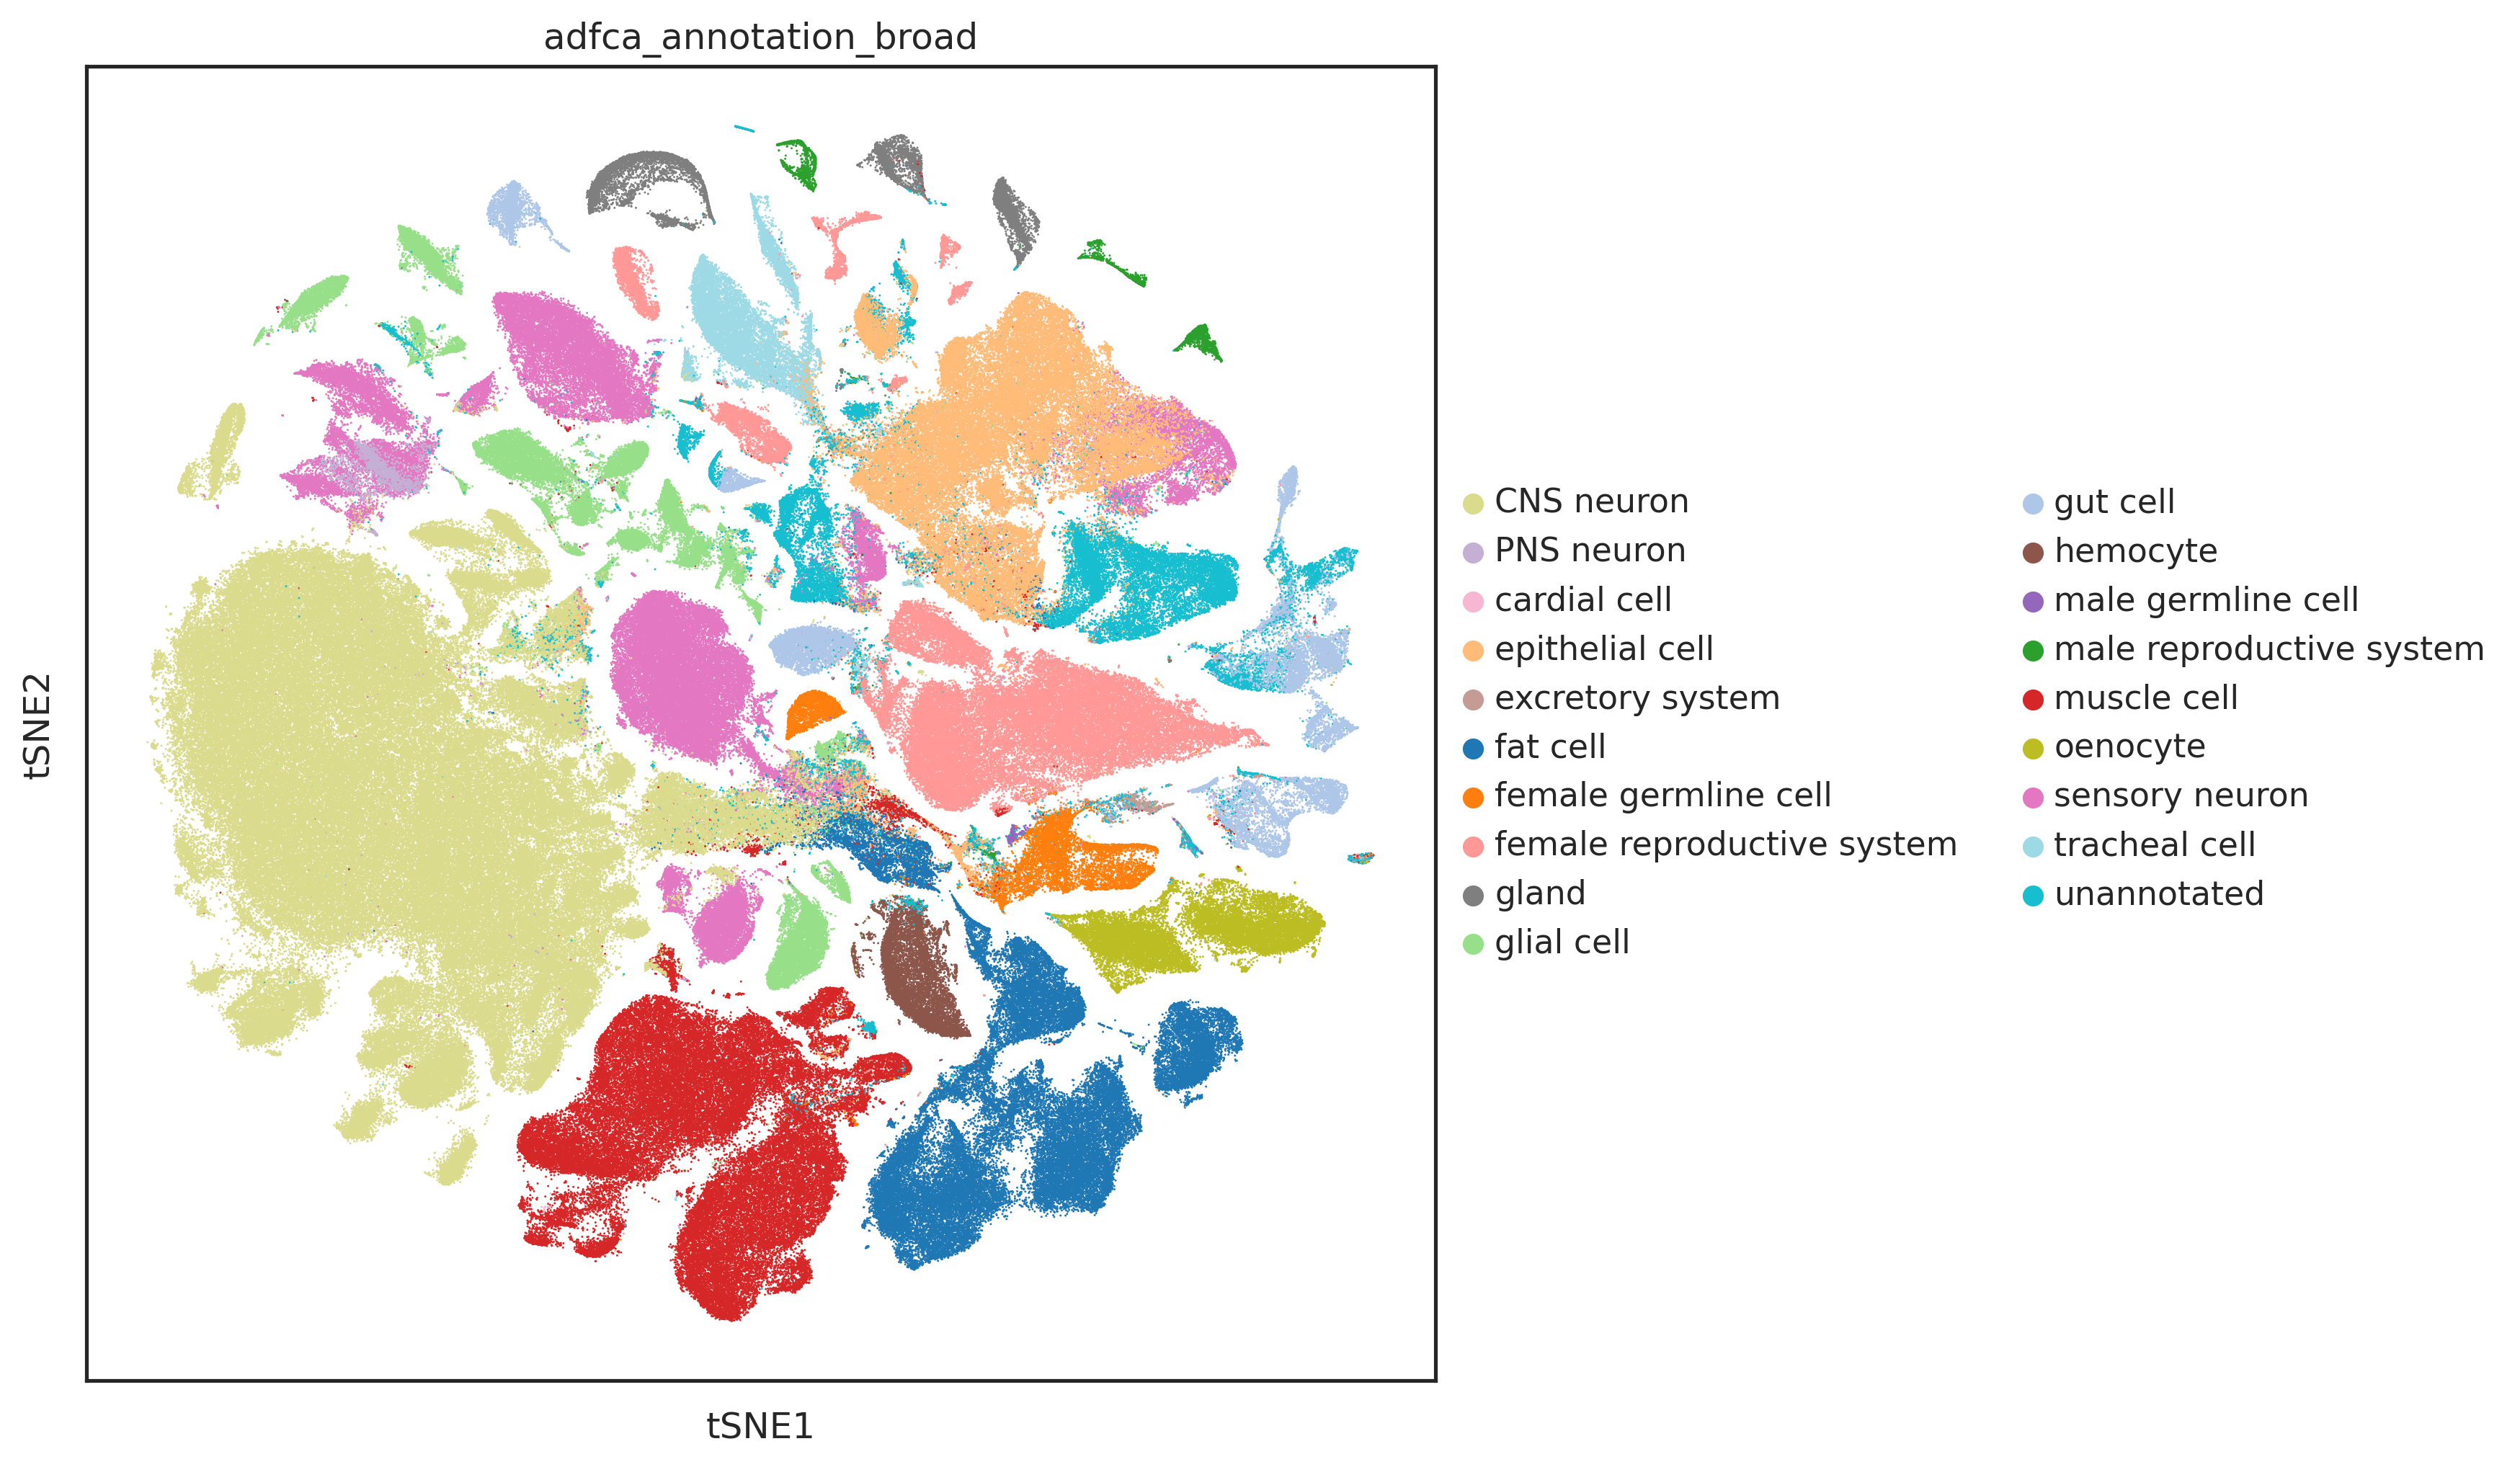

In [34]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='adfca_annotation_broad', size=2, palette=color_L2, # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               save=f'_adata_headBody_adfca_annotation_broad2_20230930.pdf')

In [35]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

In [36]:
broadColor1_D

{'CNS neuron': '#9edae5',
 'PNS neuron': '#d62728',
 'cardial cell': '#17becf',
 'epithelial cell': '#dbdb8d',
 'excretory system': '#ff9896',
 'fat cell': '#8c564b',
 'female germline cell': '#7f7f7f',
 'female reproductive system': '#98df8a',
 'gland': '#c49c94',
 'glial cell': '#e377c2',
 'gut cell': '#ff7f0e',
 'hemocyte': '#ffbb78',
 'male germline cell': '#2ca02c',
 'male reproductive system': '#1f77b4',
 'muscle cell': '#c7c7c7',
 'oenocyte': '#c5b0d5',
 'sensory neuron': '#f7b6d2',
 'tracheal cell': '#9467bd',
 'unannotated': '#bcbd22'}

In [37]:
broadColor2_D

{'CNS neuron': '#dbdb8d',
 'PNS neuron': '#c5b0d5',
 'cardial cell': '#f7b6d2',
 'epithelial cell': '#ffbb78',
 'excretory system': '#c49c94',
 'fat cell': '#1f77b4',
 'female germline cell': '#ff7f0e',
 'female reproductive system': '#ff9896',
 'gland': '#7f7f7f',
 'glial cell': '#98df8a',
 'gut cell': '#aec7e8',
 'hemocyte': '#8c564b',
 'male germline cell': '#9467bd',
 'male reproductive system': '#2ca02c',
 'muscle cell': '#d62728',
 'oenocyte': '#bcbd22',
 'sensory neuron': '#e377c2',
 'tracheal cell': '#9edae5',
 'unannotated': '#17becf'}

In [38]:
broadColor1_Df = pd.DataFrame(index = sorted(broadColor1_D.keys()))
broadColor1_Df.loc[:,'colorKey'] = [broadColor1_D[annot] for annot in broadColor1_Df.index]

broadColor1_Df

colorKey
CNS neuron                  #9edae5
PNS neuron                  #d62728
cardial cell                #17becf
epithelial cell             #dbdb8d
excretory system            #ff9896
fat cell                    #8c564b
female germline cell        #7f7f7f
female reproductive system  #98df8a
gland                       #c49c94
glial cell                  #e377c2
gut cell                    #ff7f0e
hemocyte                    #ffbb78
male germline cell          #2ca02c
male reproductive system    #1f77b4
muscle cell                 #c7c7c7
oenocyte                    #c5b0d5
sensory neuron              #f7b6d2
tracheal cell               #9467bd
unannotated                 #bcbd22

In [39]:
broadColor2_Df = pd.DataFrame(index = sorted(broadColor2_D.keys()))
broadColor2_Df.loc[:,'colorKey'] = [broadColor2_D[annot] for annot in broadColor2_Df.index]

broadColor2_Df

colorKey
CNS neuron                  #dbdb8d
PNS neuron                  #c5b0d5
cardial cell                #f7b6d2
epithelial cell             #ffbb78
excretory system            #c49c94
fat cell                    #1f77b4
female germline cell        #ff7f0e
female reproductive system  #ff9896
gland                       #7f7f7f
glial cell                  #98df8a
gut cell                    #aec7e8
hemocyte                    #8c564b
male germline cell          #9467bd
male reproductive system    #2ca02c
muscle cell                 #d62728
oenocyte                    #bcbd22
sensory neuron              #e377c2
tracheal cell               #9edae5
unannotated                 #17becf

In [40]:
broadColor1_Df.to_csv(f'{figure1Folder}/broadColor1_Df.csv')
broadColor2_Df.to_csv(f'{figure1Folder}/broadColor2_Df.csv')

In [41]:
adata_headBody.write(f'{figure1Folder}/adata_headBody_HVG_to_tsne.h5ad')

### Plot tsne for each genotype

In [42]:
adata_headBody=sc.read(f'{figure1Folder}/adata_headBody_HVG_to_tsne.h5ad')

In [43]:
with rc_context({'figure.figsize': (8, 8)}):
    for genotype in genotype_L:
        sc.pl.tsne(adata_headBody, color='genotype', groups=genotype, size=2, na_in_legend=False, title=f'{genotype}', frameon=False, show=False,
                   save=f'_adata_headBody_genotype_{genotype}.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [44]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

### Plot genotypes: show all genotypes in one plot

In [45]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='genotype', na_in_legend=False, title=f'All genotypes', frameon=False, show=False,
               save=f'_adata_headBody_genotype_all.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [46]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='genotype', size=0.5, na_in_legend=False, title=f'All genotypes', frameon=False, show=False,
               save=f'_adata_headBody_genotype_all_size0.5.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [47]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='genotype', size=1, na_in_legend=False, title=f'All genotypes', frameon=False, show=False,
               save=f'_adata_headBody_genotype_all_size1.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [48]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_headBody, color='genotype', size=2, na_in_legend=False, title=f'All genotypes', frameon=False, show=False,
               save=f'_adata_headBody_genotype_all_size2.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [49]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

## Head, body separated

In [13]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [60]:
adata_headBody = sc.read(f'{figure1Folder}/adata_headBody_HVG_to_tsne.h5ad')

In [61]:
color_L1 = ['#9edae5', '#d62728', '#17becf', '#dbdb8d', '#ff9896', '#8c564b', '#7f7f7f', '#98df8a', '#c49c94', '#e377c2', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4',
           '#c7c7c7', '#c5b0d5', '#f7b6d2', '#9467bd', '#bcbd22', '#aec7e8']

In [62]:
color_L2 = ['#dbdb8d', '#c5b0d5', '#f7b6d2', '#ffbb78', '#c49c94', '#1f77b4', '#ff7f0e', '#ff9896', '#7f7f7f', '#98df8a', '#aec7e8', '#8c564b', '#9467bd', '#2ca02c',
 '#d62728', '#bcbd22', '#e377c2', '#9edae5', '#17becf', '#c7c7c7']

In [63]:
broadColor1_D = dict(zip(adata_headBody.obs.adfca_annotation_broad.cat.categories, color_L1))
broadColor2_D = dict(zip(adata_headBody.obs.adfca_annotation_broad.cat.categories, color_L2))

In [64]:
adata_head.obs.adfca_annotation_broad.cat.categories

Index(['CNS neuron', 'epithelial cell', 'fat cell', 'glial cell', 'hemocyte',
       'muscle cell', 'sensory neuron', 'tracheal cell', 'unannotated'],
      dtype='object')

In [65]:
adata_head.obs.adfca_annotation_broad.cat.categories

Index(['CNS neuron', 'epithelial cell', 'fat cell', 'glial cell', 'hemocyte',
       'muscle cell', 'sensory neuron', 'tracheal cell', 'unannotated'],
      dtype='object')

In [66]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_head, color='adfca_annotation_broad', size=2, show=False, frameon=False, # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               palette=[broadColor1_D[annot] for annot in adata_head.obs.adfca_annotation_broad.cat.categories],
               save=f'_adata_head_adfca_annotation_broad_color1.pdf')
    sc.pl.tsne(adata_body, color='adfca_annotation_broad', size=2, show=False, frameon=False, # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               palette=[broadColor1_D[annot] for annot in adata_body.obs.adfca_annotation_broad.cat.categories],
               save=f'_adata_body_adfca_annotation_broad_color1.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [67]:
# broadColor_D = dict(zip(adata_headBody.obs.adfca_annotation_broad.cat.categories, adata_headBody.uns['adfca_annotation_broad_colors']))

In [68]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.tsne(adata_head, color='adfca_annotation_broad', size=2, show=False, frameon=False,
               palette=[broadColor2_D[annot] for annot in adata_head.obs.adfca_annotation_broad.cat.categories], # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               save=f'_adata_head_adfca_annotation_broad_color2.pdf')
    sc.pl.tsne(adata_body, color='adfca_annotation_broad', size=2, show=False, frameon=False,
               palette=[broadColor2_D[annot] for annot in adata_body.obs.adfca_annotation_broad.cat.categories], # palette=random.sample(sc.pl.palettes.vega_20, 20) 
               save=f'_adata_body_adfca_annotation_broad_color2..pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [69]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

# Sup figures

## Load files

In [13]:
# adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
# adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [13]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_head_v1.0.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_body_v1.0.h5ad')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [14]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')
adata_headBody

<ipython-input-14-d569f6e12017>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_headBody = adata_head.concatenate(adata_body, join='outer')


AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'sample', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'genoAge', 'genoSex', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'adfca_annotation_group', 'adfca_annotation_subcluster', 'batch'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

## Expression of AB42 and hTau

In [19]:
with rc_context({'figure.figsize': (6, 6)}):
    for gene in ['ABeta42', 'hTau0N4Rfull', 'nSyb'][:]:
        sc.pl.tsne(adata_head, color=gene, size=2, frameon=False, show=False, cmap="Reds", vmin=1, vmax=6,
                   save=f'_adata_head_adfca_{gene}.pdf')
        sc.pl.tsne(adata_body, color=gene, size=2, frameon=False, show=False, cmap="Reds", vmin=1, vmax=6,
                   save=f'_adata_body_adfca_{gene}.pdf')

In [20]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

# Sup figures: head/body annotations

In [13]:
# adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
# adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [16]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_head_v1.0.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_body_v1.0.h5ad')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


## Colored by adfca_annotation

In [17]:
# with rc_context({'figure.figsize': (18, 6)}):
for adata in [adata_head, adata_body]:
    tissue = adata.obs.tissue[0]
    
    figU, ax = plt.subplots(figsize=(6, 6))
    sc.pl.tsne(adata, color=['adfca_annotation'], frameon=False, 
               na_in_legend=False, show=False, size=1, ax= ax, title=f'{tissue}') # size=2, 
    plt.savefig(f'{figure1PicFolder}/tsne_adfca_{tissue}_adfca_annotation.pdf', bbox_inches='tight')
    plt.close()
    
    figU, ax = plt.subplots(figsize=(6, 6))
    sc.pl.tsne(adata, color=['adfca_annotation'], frameon=False, legend_loc=False,
               na_in_legend=False, show=False, size=1, ax= ax, title=f'{tissue}') # size=2, 
    plt.savefig(f'{figure1PicFolder}/tsne_adfca_{tissue}_adfca_annotation_noLegend.pdf', bbox_inches='tight')
    plt.close()

<ipython-input-17-d903fbebc564>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = adata.obs.tissue[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.p

## Colored by adfca_annotation with number

In [18]:
annotToAnnot_wNum_D = dict(zip(adata_head.obs.adfca_annotation.cat.categories.to_list(), 
                                    [f'{n}.{annot}' for n, annot in enumerate(adata_head.obs.adfca_annotation.cat.categories)] ))
annotToAnnot_num_D =  dict(zip(adata_head.obs.adfca_annotation.cat.categories.to_list(), 
                                    [f'{n}' for n, annot in enumerate(adata_head.obs.adfca_annotation.cat.categories)] ))

adata_head.obs['adfca_annotation_wNum'] = pd.Categorical([annotToAnnot_wNum_D[annot] for n, annot in enumerate(adata_head.obs.adfca_annotation)], 
                                                         categories=[f'{n}.{annot}' for n, annot in enumerate(adata_head.obs.adfca_annotation.cat.categories)] )
adata_head.obs['adfca_annotation_num'] = pd.Categorical([annotToAnnot_num_D[annot] for n, annot in enumerate(adata_head.obs.adfca_annotation)], 
                                                        categories=[f'{n}' for n, annot in enumerate(adata_head.obs.adfca_annotation.cat.categories)] )

In [19]:
annotToAnnot_wNum_D = dict(zip(adata_body.obs.adfca_annotation.cat.categories.to_list(), 
                                    [f'{n}.{annot}' for n, annot in enumerate(adata_body.obs.adfca_annotation.cat.categories)] ))
annotToAnnot_num_D =  dict(zip(adata_body.obs.adfca_annotation.cat.categories.to_list(), 
                                    [f'{n}' for n, annot in enumerate(adata_body.obs.adfca_annotation.cat.categories)] ))

adata_body.obs['adfca_annotation_wNum'] = pd.Categorical([annotToAnnot_wNum_D[annot] for n, annot in enumerate(adata_body.obs.adfca_annotation)], 
                                                         categories=[f'{n}.{annot}' for n, annot in enumerate(adata_body.obs.adfca_annotation.cat.categories)] )
adata_body.obs['adfca_annotation_num'] = pd.Categorical([annotToAnnot_num_D[annot] for n, annot in enumerate(adata_body.obs.adfca_annotation)], 
                                                        categories=[f'{n}' for n, annot in enumerate(adata_body.obs.adfca_annotation.cat.categories)] )

In [20]:
adata_body

AnnData object with n_obs × n_vars = 264422 × 16219
    obs: 'sample', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'genoAge', 'genoSex', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'adfca_annotation_group', 'adfca_annotation_subcluster', 'adfca_annotation_wNum', 'adfca_annotation_num'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'adfca_annotation_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'
    obsp: 'connectivities', 'distances'

In [21]:
with rc_context({'figure.figsize': (8, 8)}):
    for adata in [adata_head, adata_body]:
        tissue = adata.obs.tissue[0]
        adata.uns['adfca_annotation_wNum_colors'] = adata.uns['adfca_annotation_colors']
        adata.uns['adfca_annotation_num_colors'] = adata.uns['adfca_annotation_colors']
        
        tissue = adata.obs.tissue[0]

        sc.pl.tsne(adata, color=['adfca_annotation_wNum'], frameon=False, 
                   na_in_legend=False, show=False, size=1, title=f'{tissue}', 
                   save=f'_adfca_{tissue}_adfca_annotation_wNum.pdf') # size=2, 

        sc.pl.tsne(adata, color=['adfca_annotation_num'], frameon=False, legend_loc='on data', legend_fontsize=6,
                   na_in_legend=False, show=False, size=1, title=f'{tissue}', 
                   save=f'_adfca_{tissue}_adfca_annotation_num.pdf') # size=2, 

<ipython-input-21-42cfd9bbba04>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = adata.obs.tissue[0]
<ipython-input-21-42cfd9bbba04>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = adata.obs.tissue[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
<ipython-input-21-42cfd9bbba04>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = adata.obs.tissue[0]
<ipython-input-21-42cfd9bbba04>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = adata.obs.tissue[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categ

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [22]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

## Load files

In [13]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [14]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


## Basic QC

In [15]:
adata_headBody.obs.tissue.value_counts()

head    360036
body    264422
Name: tissue, dtype: int64

In [16]:
adata_headBody

AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

In [18]:
# with rc_context({'figure.figsize': (12, 4)}):
for feature in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt']:
    figs, axs = plt.subplots(1, 2, figsize=(14, 4))
    for n, tissue in enumerate(['head', 'body']):
        sc.pl.violin(adata_headBody[adata_headBody.obs.tissue == tissue], keys=feature, groupby='genoAgeSex', jitter=0.4, size=0.2, rotation=90, ax=axs[n],  show=False, )
        axs[n].title.set_text(f'{tissue}_{feature}')
    plt.savefig(f'{figure1PicFolder}/violin_{feature}_groupbyGenoAgeSex_rankedByAge.pdf', bbox_inches='tight')
    plt.close()

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

In [28]:
adata_headBody.obs.genoAgeSex.cat.categories

Index(['control_10_female', 'control_10_male', 'control_20_female',
       'control_20_male', 'control_30_female', 'control_30_male',
       'AB42_10_female', 'AB42_10_male', 'AB42_20_female', 'AB42_20_male',
       'hTau_20_female', 'hTau_20_male', 'hTau_30_female', 'hTau_30_male'],
      dtype='object')

In [ ]:
# genoAgeSex_L0 = ['control_10_female',
#  'control_20_female',
#  'control_30_female',
#  'control_10_male',
#  'control_20_male',
#  'control_30_male',
#  'AB42_10_female',
#  'AB42_20_female',
#  'AB42_10_male',
#  'AB42_20_male',
#  'hTau_20_female',
#  'hTau_30_female',
#  'hTau_20_male',
#  'hTau_30_male']

In [ ]:
# genoAgeSex_L = ['control_10_female', 'control_10_male', 'AB42_10_female', 'AB42_10_male',
#                 'control_20_female', 'control_20_male', 'AB42_20_female', 'AB42_20_male', 'hTau_20_female', 'hTau_20_male', 
#                 'control_30_female', 'control_30_male', 'AB42_30_female', 'AB42_30_male', 'hTau_30_female', 'hTau_30_male',]

In [ ]:
# adata_headBody.obs.genoAgeSex = pd.Categorical(adata_headBody.obs.genoAgeSex, categories=genoAgeSex_L)

In [ ]:
# # with rc_context({'figure.figsize': (12, 4)}):
# for feature in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt']:
#     figs, axs = plt.subplots(1, 2, figsize=(14, 4))
#     for n, tissue in enumerate(['head', 'body']):
#         sc.pl.violin(adata_headBody[adata_headBody.obs.tissue == tissue], keys=feature, groupby='genoAgeSex', jitter=0.4, size=0.1, rotation=90, ax=axs[n],  show=False, )
#         axs[n].title.set_text(f'{tissue}_{feature}')
#     plt.savefig(f'{figure1PicFolder}/violin_{feature}_groupbyGenoAgeSex.pdf', bbox_inches='tight')
#     plt.close()

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

## QC: cellN & sequencing saturation

In [29]:
adata_headBody

AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster', 'genoAgeSexTissue', 'genoAgeSexTissue_dataset'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

In [30]:
adata_headBody.obs['genoAgeSex']

TTCGCTGTCCCAAGCG-1_11_D20CEFH-0    control_20_female
CTCAATTAGACCACGA-1_11_D20CEFH-0    control_20_female
GCTACCTTCACCCTCA-1_11_D20CEFH-0    control_20_female
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0    control_20_female
ATTGTTCTCAGTCATG-1_11_D20CEFH-0    control_20_female
                                         ...        
GAGTTGTCACATTCGA-1_8_D10ABFB-1        AB42_10_female
GAAGCGACAGTTACCA-1_8_D10ABFB-1        AB42_10_female
AGCGTCGTCCATGATG-1_8_D10ABFB-1        AB42_10_female
CACAGGCGTCTGTGTA-1_8_D10ABFB-1        AB42_10_female
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1        AB42_10_female
Name: genoAgeSex, Length: 624458, dtype: category
Categories (14, object): ['control_10_female', 'control_10_male', 'control_20_female', 'control_20_male', ..., 'hTau_20_female', 'hTau_20_male', 'hTau_30_female', 'hTau_30_male']

In [31]:
adata_headBody.obs['genoAgeSexTissue'] = pd.Categorical(adata_headBody.obs.genoAgeSex.astype(str) + '_' + adata_headBody.obs.tissue.astype(str))
adata_headBody.obs['genoAgeSexTissue'] 

TTCGCTGTCCCAAGCG-1_11_D20CEFH-0    control_20_female_head
CTCAATTAGACCACGA-1_11_D20CEFH-0    control_20_female_head
GCTACCTTCACCCTCA-1_11_D20CEFH-0    control_20_female_head
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0    control_20_female_head
ATTGTTCTCAGTCATG-1_11_D20CEFH-0    control_20_female_head
                                            ...          
GAGTTGTCACATTCGA-1_8_D10ABFB-1        AB42_10_female_body
GAAGCGACAGTTACCA-1_8_D10ABFB-1        AB42_10_female_body
AGCGTCGTCCATGATG-1_8_D10ABFB-1        AB42_10_female_body
CACAGGCGTCTGTGTA-1_8_D10ABFB-1        AB42_10_female_body
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1        AB42_10_female_body
Name: genoAgeSexTissue, Length: 624458, dtype: category
Categories (28, object): ['AB42_10_female_body', 'AB42_10_female_head', 'AB42_10_male_body', 'AB42_10_male_head', ..., 'hTau_30_female_body', 'hTau_30_female_head', 'hTau_30_male_body', 'hTau_30_male_head']

In [32]:
adata_headBody.obs['genoAgeSexTissue_dataset'] = pd.Categorical(adata_headBody.obs.genoAgeSexTissue.astype(str) + '_' + adata_headBody.obs.dataset.astype(str))
adata_headBody.obs['genoAgeSexTissue_dataset'] 

TTCGCTGTCCCAAGCG-1_11_D20CEFH-0    control_20_female_head_11_D20CEFH
CTCAATTAGACCACGA-1_11_D20CEFH-0    control_20_female_head_11_D20CEFH
GCTACCTTCACCCTCA-1_11_D20CEFH-0    control_20_female_head_11_D20CEFH
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0    control_20_female_head_11_D20CEFH
ATTGTTCTCAGTCATG-1_11_D20CEFH-0    control_20_female_head_11_D20CEFH
                                                 ...                
GAGTTGTCACATTCGA-1_8_D10ABFB-1         AB42_10_female_body_8_D10ABFB
GAAGCGACAGTTACCA-1_8_D10ABFB-1         AB42_10_female_body_8_D10ABFB
AGCGTCGTCCATGATG-1_8_D10ABFB-1         AB42_10_female_body_8_D10ABFB
CACAGGCGTCTGTGTA-1_8_D10ABFB-1         AB42_10_female_body_8_D10ABFB
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1         AB42_10_female_body_8_D10ABFB
Name: genoAgeSexTissue_dataset, Length: 624458, dtype: category
Categories (28, object): ['AB42_10_female_body_8_D10ABFB', 'AB42_10_female_head_7_D10ABFH', 'AB42_10_male_body_6_D10ABMB', 'AB42_10_male_head_5_D10ABMH', ..., 'hTau_30_female_bo

In [33]:
record_D = {}
for record in adata_headBody.obs.genoAgeSexTissue_dataset.cat.categories:
    dataset, expRecord = '_'.join(record.split('_')[:-2]), '_'.join(record.split('_')[-2:])
    print(record)
    print(dataset, expRecord)
    record_D[expRecord] = dataset

AB42_10_female_body_8_D10ABFB
AB42_10_female_body 8_D10ABFB
AB42_10_female_head_7_D10ABFH
AB42_10_female_head 7_D10ABFH
AB42_10_male_body_6_D10ABMB
AB42_10_male_body 6_D10ABMB
AB42_10_male_head_5_D10ABMH
AB42_10_male_head 5_D10ABMH
AB42_20_female_body_16_D20ABFB
AB42_20_female_body 16_D20ABFB
AB42_20_female_head_15_D20ABFH
AB42_20_female_head 15_D20ABFH
AB42_20_male_body_14_D20ABMB
AB42_20_male_body 14_D20ABMB
AB42_20_male_head_13_D20ABMH
AB42_20_male_head 13_D20ABMH
control_10_female_body_4_D10CEFB
control_10_female_body 4_D10CEFB
control_10_female_head_3_D10CEFH
control_10_female_head 3_D10CEFH
control_10_male_body_2_D10CEMB
control_10_male_body 2_D10CEMB
control_10_male_head_1_D10CEMH
control_10_male_head 1_D10CEMH
control_20_female_body_12_D20CEFB
control_20_female_body 12_D20CEFB
control_20_female_head_11_D20CEFH
control_20_female_head 11_D20CEFH
control_20_male_body_10_D20CEMB
control_20_male_body 10_D20CEMB
control_20_male_head_9_D20CEMH
control_20_male_head 9_D20CEMH
control_30

In [34]:
crSummary_Df = pd.read_csv(f'cellrangerSummary/all_metrics.csv')
crSummary_Df

SampleName Estimated Number of Cells Mean Reads per Cell  \
0   10_D20CEMB                    18,791              85,065   
1   11_D20CEFH                    48,759              11,551   
2   12_D20CEFB                    31,547              33,650   
3   13_D20ABMH                    33,848              26,898   
4   14_D20ABMB                    15,315              81,870   
5   15_D20ABFH                    30,067              28,480   
6   16_D20ABFB                    26,317              37,497   
7   17_D20TWMH                    33,912              31,044   
8   18_D20TWMB                    30,387              31,244   
9   19_D20TWFH                    52,376              20,781   
10   1_D10CEMH                    40,740              17,011   
11  20_D20TWFB                    48,591              20,783   
12  21_D30CEMH                    35,927              28,601   
13  22_D30CEMB                    22,926              45,200   
14  23_D30CEFH                    36,388              20,121   
15  24_D30CEFB                    20,386              39,955   
16  25_D30TWMH                    41,191              24,948   
17  26_D30TWMB                    14,749              64,941   
18  27_D30TWFH                    26,112              30,074   
19  28_D30TWFB                    20,627              39,265   
20   2_D10CEMB                    26,841              37,220   
21   3_D10CEFH                    40,329              27,769   
22   4_D10CEFB                    34,716              30,028   
23   5_D10ABMH                    33,496              25,729   
24   6_D10ABMB                    26,317              39,972   
25   7_D10ABFH                    36,850              24,624   
26   8_D10ABFB                    45,758              22,280   
27   9_D20CEMH                    36,895              21,667   

   Median Genes per Cell Number of Reads Valid Barcodes Sequencing Saturation  \
0                    727   1,598,452,338          97.2%                 92.8%   
1                    745     563,215,460          97.0%                 58.2%   
2                  1,103   1,061,544,063          96.5%                 70.4%   
3                    800     910,433,518          96.7%                 78.3%   
4                    733   1,253,846,383          97.2%                 92.6%   
5                    805     856,320,035          96.7%                 77.5%   
6                    964     986,808,352          96.9%                 74.1%   
7                    667   1,052,762,050          97.0%                 85.3%   
8                    607     949,403,157          96.8%                 77.1%   
9                    785   1,088,444,771          96.7%                 73.0%   
10                   799     693,034,060          96.4%                 67.2%   
11                   760   1,009,887,145          96.7%                 68.0%   
12                   714   1,027,543,514          97.1%                 82.7%   
13                   700   1,036,245,611          96.6%                 85.5%   
14                   653     732,171,204          96.4%                 77.9%   
15                   725     814,519,409          96.7%                 83.4%   
16                   726   1,027,619,916          96.9%                 80.7%   
17                   696     957,821,096          96.6%                 89.2%   
18                   649     785,302,795          96.6%                 84.0%   
19                   703     809,923,889          96.7%                 83.7%   
20                   943     999,030,277          96.7%                 76.2%   
21                   885   1,119,886,782          96.7%                 73.1%   
22                 1,048   1,042,465,562          96.7%                 67.9%   
23                   935     861,817,417          96.7%                 70.5%   
24                   967   1,051,938,621          96.8%                 76.3%   
25                   864     907,389,958 

In [35]:
crSummary_Df['genoAgeSexTissue'] = pd.Categorical([record_D[name] for name in crSummary_Df.SampleName])
crSummary_Df['tissue'] = pd.Categorical([name.split('_')[-1] for name in crSummary_Df.genoAgeSexTissue])
crSummary_Df['genoAgeSex'] = pd.Categorical([ '_'.join(name.split('_')[:-1]) for name in crSummary_Df.genoAgeSexTissue], categories=adata_headBody.obs.genoAgeSex.cat.categories)
crSummary_Df['genotype'] = pd.Categorical([ name.split('_')[0] for name in crSummary_Df.genoAgeSexTissue])
crSummary_Df['age'] = pd.Categorical([ name.split('_')[1] for name in crSummary_Df.genoAgeSexTissue])
crSummary_Df['sex'] = pd.Categorical([ name.split('_')[2] for name in crSummary_Df.genoAgeSexTissue])

crSummary_Df

SampleName Estimated Number of Cells Mean Reads per Cell  \
0   10_D20CEMB                    18,791              85,065   
1   11_D20CEFH                    48,759              11,551   
2   12_D20CEFB                    31,547              33,650   
3   13_D20ABMH                    33,848              26,898   
4   14_D20ABMB                    15,315              81,870   
5   15_D20ABFH                    30,067              28,480   
6   16_D20ABFB                    26,317              37,497   
7   17_D20TWMH                    33,912              31,044   
8   18_D20TWMB                    30,387              31,244   
9   19_D20TWFH                    52,376              20,781   
10   1_D10CEMH                    40,740              17,011   
11  20_D20TWFB                    48,591              20,783   
12  21_D30CEMH                    35,927              28,601   
13  22_D30CEMB                    22,926              45,200   
14  23_D30CEFH                    36,388              20,121   
15  24_D30CEFB                    20,386              39,955   
16  25_D30TWMH                    41,191              24,948   
17  26_D30TWMB                    14,749              64,941   
18  27_D30TWFH                    26,112              30,074   
19  28_D30TWFB                    20,627              39,265   
20   2_D10CEMB                    26,841              37,220   
21   3_D10CEFH                    40,329              27,769   
22   4_D10CEFB                    34,716              30,028   
23   5_D10ABMH                    33,496              25,729   
24   6_D10ABMB                    26,317              39,972   
25   7_D10ABFH                    36,850              24,624   
26   8_D10ABFB                    45,758              22,280   
27   9_D20CEMH                    36,895              21,667   

   Median Genes per Cell Number of Reads Valid Barcodes Sequencing Saturation  \
0                    727   1,598,452,338          97.2%                 92.8%   
1                    745     563,215,460          97.0%                 58.2%   
2                  1,103   1,061,544,063          96.5%                 70.4%   
3                    800     910,433,518          96.7%                 78.3%   
4                    733   1,253,846,383          97.2%                 92.6%   
5                    805     856,320,035          96.7%                 77.5%   
6                    964     986,808,352          96.9%                 74.1%   
7                    667   1,052,762,050          97.0%                 85.3%   
8                    607     949,403,157          96.8%                 77.1%   
9                    785   1,088,444,771          96.7%                 73.0%   
10                   799     693,034,060          96.4%                 67.2%   
11                   760   1,009,887,145          96.7%                 68.0%   
12                   714   1,027,543,514          97.1%                 82.7%   
13                   700   1,036,245,611          96.6%                 85.5%   
14                   653     732,171,204          96.4%                 77.9%   
15                   725     814,519,409          96.7%                 83.4%   
16                   726   1,027,619,916          96.9%                 80.7%   
17                   696     957,821,096          96.6%                 89.2%   
18                   649     785,302,795          96.6%                 84.0%   
19                   703     809,923,889          96.7%                 83.7%   
20                   943     999,030,277          96.7%                 76.2%   
21                   885   1,119,886,782          96.7%                 73.1%   
22                 1,048   1,042,465,562          96.7%                 67.9%   
23                   935     861,817,417          96.7%                 70.5%   
24                   967   1,051,938,621          96.8%                 76.3%   
25                   864     907,389,958 

In [36]:
crSummary_Df.columns

Index(['SampleName', 'Estimated Number of Cells', 'Mean Reads per Cell',
       'Median Genes per Cell', 'Number of Reads', 'Valid Barcodes',
       'Sequencing Saturation', 'Q30 Bases in Barcode',
       'Q30 Bases in RNA Read', 'Q30 Bases in UMI', 'Reads Mapped to Genome',
       'Reads Mapped Confidently to Genome',
       'Reads Mapped Confidently to Intergenic Regions',
       'Reads Mapped Confidently to Intronic Regions',
       'Reads Mapped Confidently to Exonic Regions',
       'Reads Mapped Confidently to Transcriptome',
       'Reads Mapped Antisense to Gene', 'Fraction Reads in Cells',
       'Total Genes Detected', 'Median UMI Counts per Cell',
       'genoAgeSexTissue', 'tissue', 'genoAgeSex', 'genotype', 'age', 'sex'],
      dtype='object')

In [37]:
crSummary_Df.columns.to_list()[1:5]+crSummary_Df.columns.to_list()[6:7]+['Median UMI Counts per Cell']

['Estimated Number of Cells',
 'Mean Reads per Cell',
 'Median Genes per Cell',
 'Number of Reads',
 'Sequencing Saturation',
 'Median UMI Counts per Cell']

In [38]:
feature_L = crSummary_Df.columns.to_list()[1:5]+crSummary_Df.columns.to_list()[6:7]+['Median UMI Counts per Cell']
crSummary_Df_select = crSummary_Df.loc[:,feature_L]
for col in feature_L:
    if col != 'Sequencing Saturation':
        crSummary_Df[col] = [ int(''.join(value.split(','))) for value in crSummary_Df[col]]
    else: crSummary_Df[col] = [ float(value[:-1]) for value in crSummary_Df[col]]
    
crSummary_Df

SampleName  Estimated Number of Cells  Mean Reads per Cell  \
0   10_D20CEMB                      18791                85065   
1   11_D20CEFH                      48759                11551   
2   12_D20CEFB                      31547                33650   
3   13_D20ABMH                      33848                26898   
4   14_D20ABMB                      15315                81870   
5   15_D20ABFH                      30067                28480   
6   16_D20ABFB                      26317                37497   
7   17_D20TWMH                      33912                31044   
8   18_D20TWMB                      30387                31244   
9   19_D20TWFH                      52376                20781   
10   1_D10CEMH                      40740                17011   
11  20_D20TWFB                      48591                20783   
12  21_D30CEMH                      35927                28601   
13  22_D30CEMB                      22926                45200   
14  23_D30CEFH                      36388                20121   
15  24_D30CEFB                      20386                39955   
16  25_D30TWMH                      41191                24948   
17  26_D30TWMB                      14749                64941   
18  27_D30TWFH                      26112                30074   
19  28_D30TWFB                      20627                39265   
20   2_D10CEMB                      26841                37220   
21   3_D10CEFH                      40329                27769   
22   4_D10CEFB                      34716                30028   
23   5_D10ABMH                      33496                25729   
24   6_D10ABMB                      26317                39972   
25   7_D10ABFH                      36850                24624   
26   8_D10ABFB                      45758                22280   
27   9_D20CEMH                      36895                21667   

    Median Genes per Cell  Number of Reads Valid Barcodes  \
0                     727       1598452338          97.2%   
1                     745        563215460          97.0%   
2                    1103       1061544063          96.5%   
3                     800        910433518          96.7%   
4                     733       1253846383          97.2%   
5                     805        856320035          96.7%   
6                     964        986808352          96.9%   
7                     667       1052762050          97.0%   
8                     607        949403157          96.8%   
9                     785       1088444771          96.7%   
10                    799        693034060          96.4%   
11                    760       1009887145          96.7%   
12                    714       1027543514          97.1%   
13                    700       1036245611          96.6%   
14                    653        732171204          96.4%   
15                    725        814519409          96.7%   
16                    726       1027619916          96.9%   
17                    696        957821096          96.6%   
18                    649        785302795          96.6%   
19                    703        809923889          96.7%   
20                    943        999030277          96.7%   
21                    885       1119886782          96.7%   
22                   1048       1042465562          96.7%   
23                    935        861817417          96.7%   
24                    967       1051938621          96.8%   
25                    864        907389958          96.7%   
26                    942       1019485527          96.7%   
27                    852        799409022          96.8%   

    Sequencing Saturation Q30 Bases in Barcode Q30 Bases in RNA Read  \
0                    92.8                95.6%                 89.3%   
1                    58.2                96.5%                 91.6%   
2                    70.4                96.2%                 88.3%   
3                    78.3      

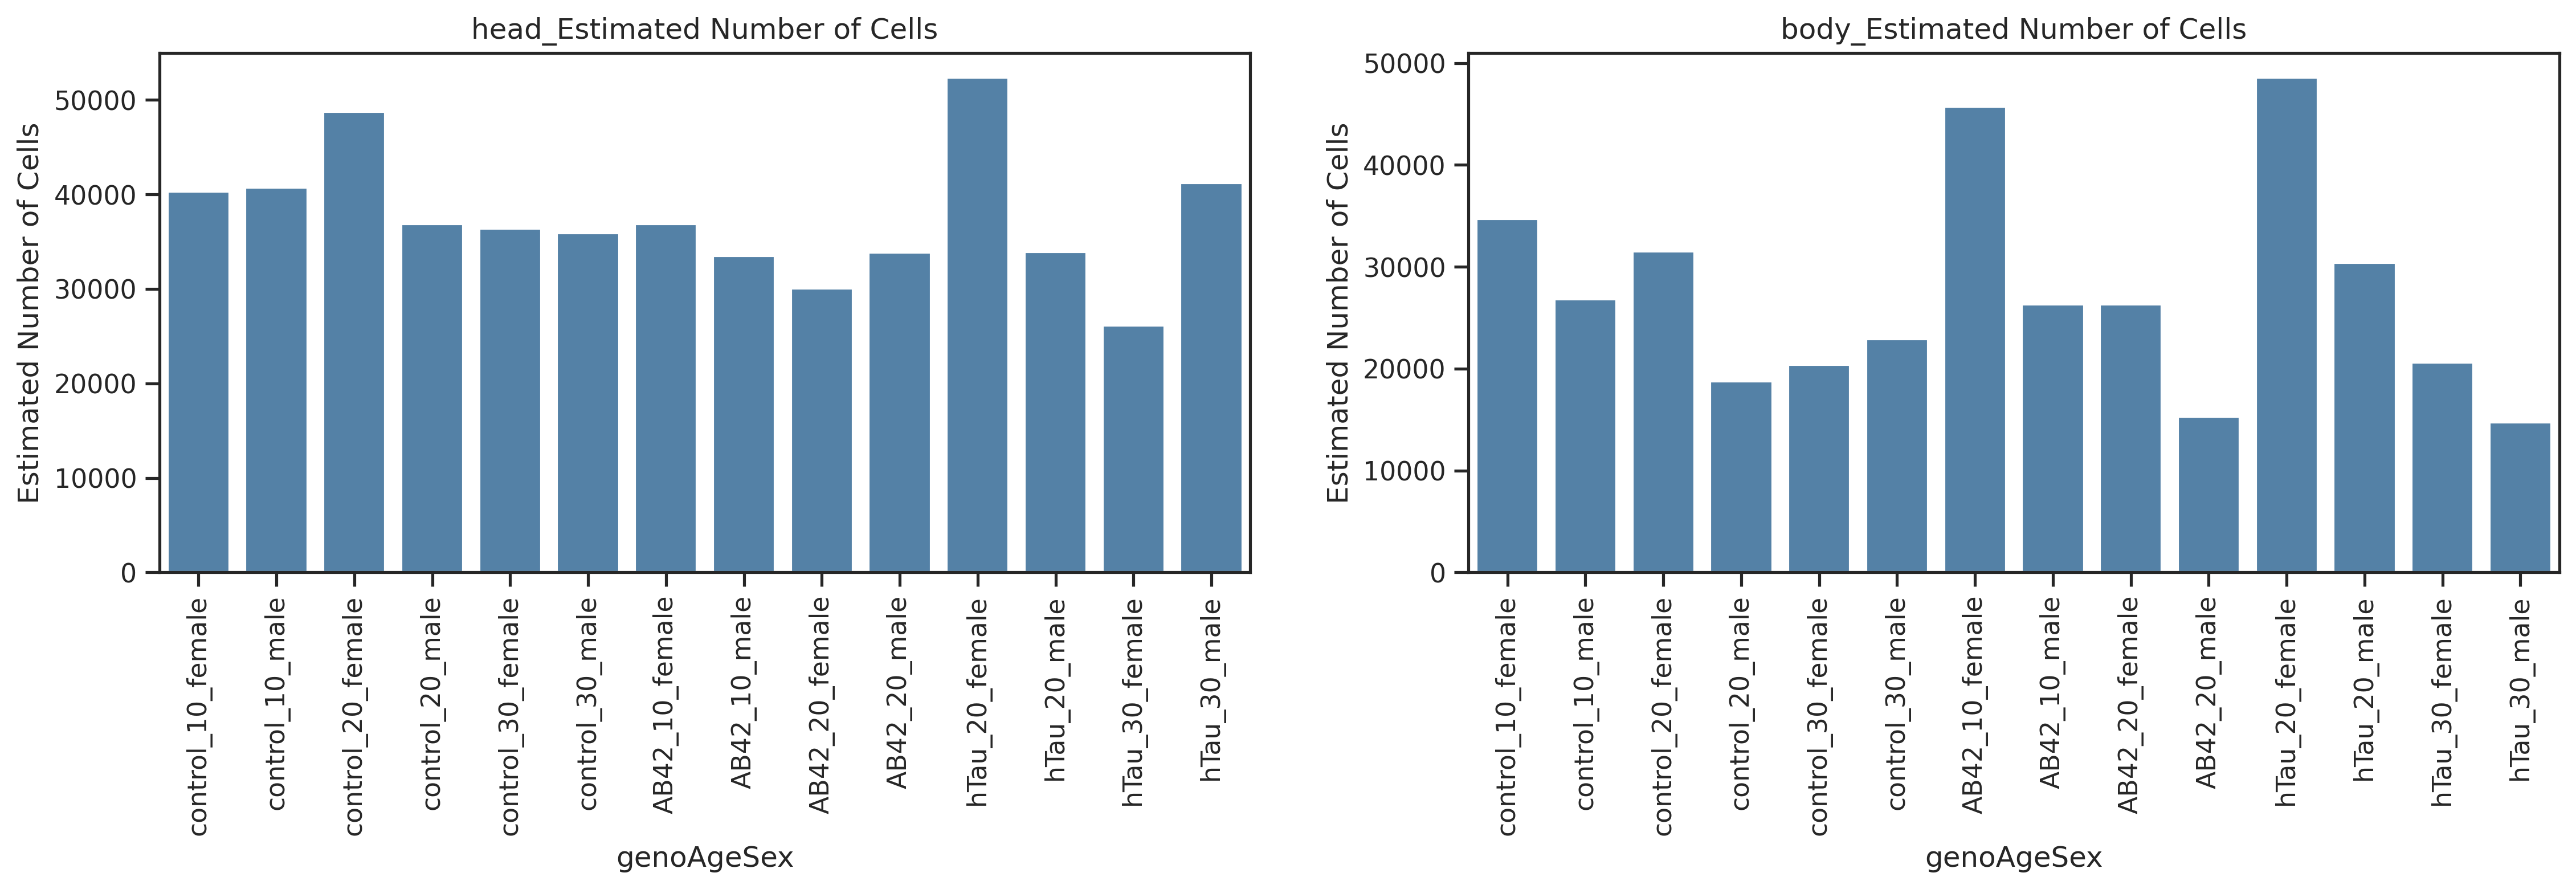

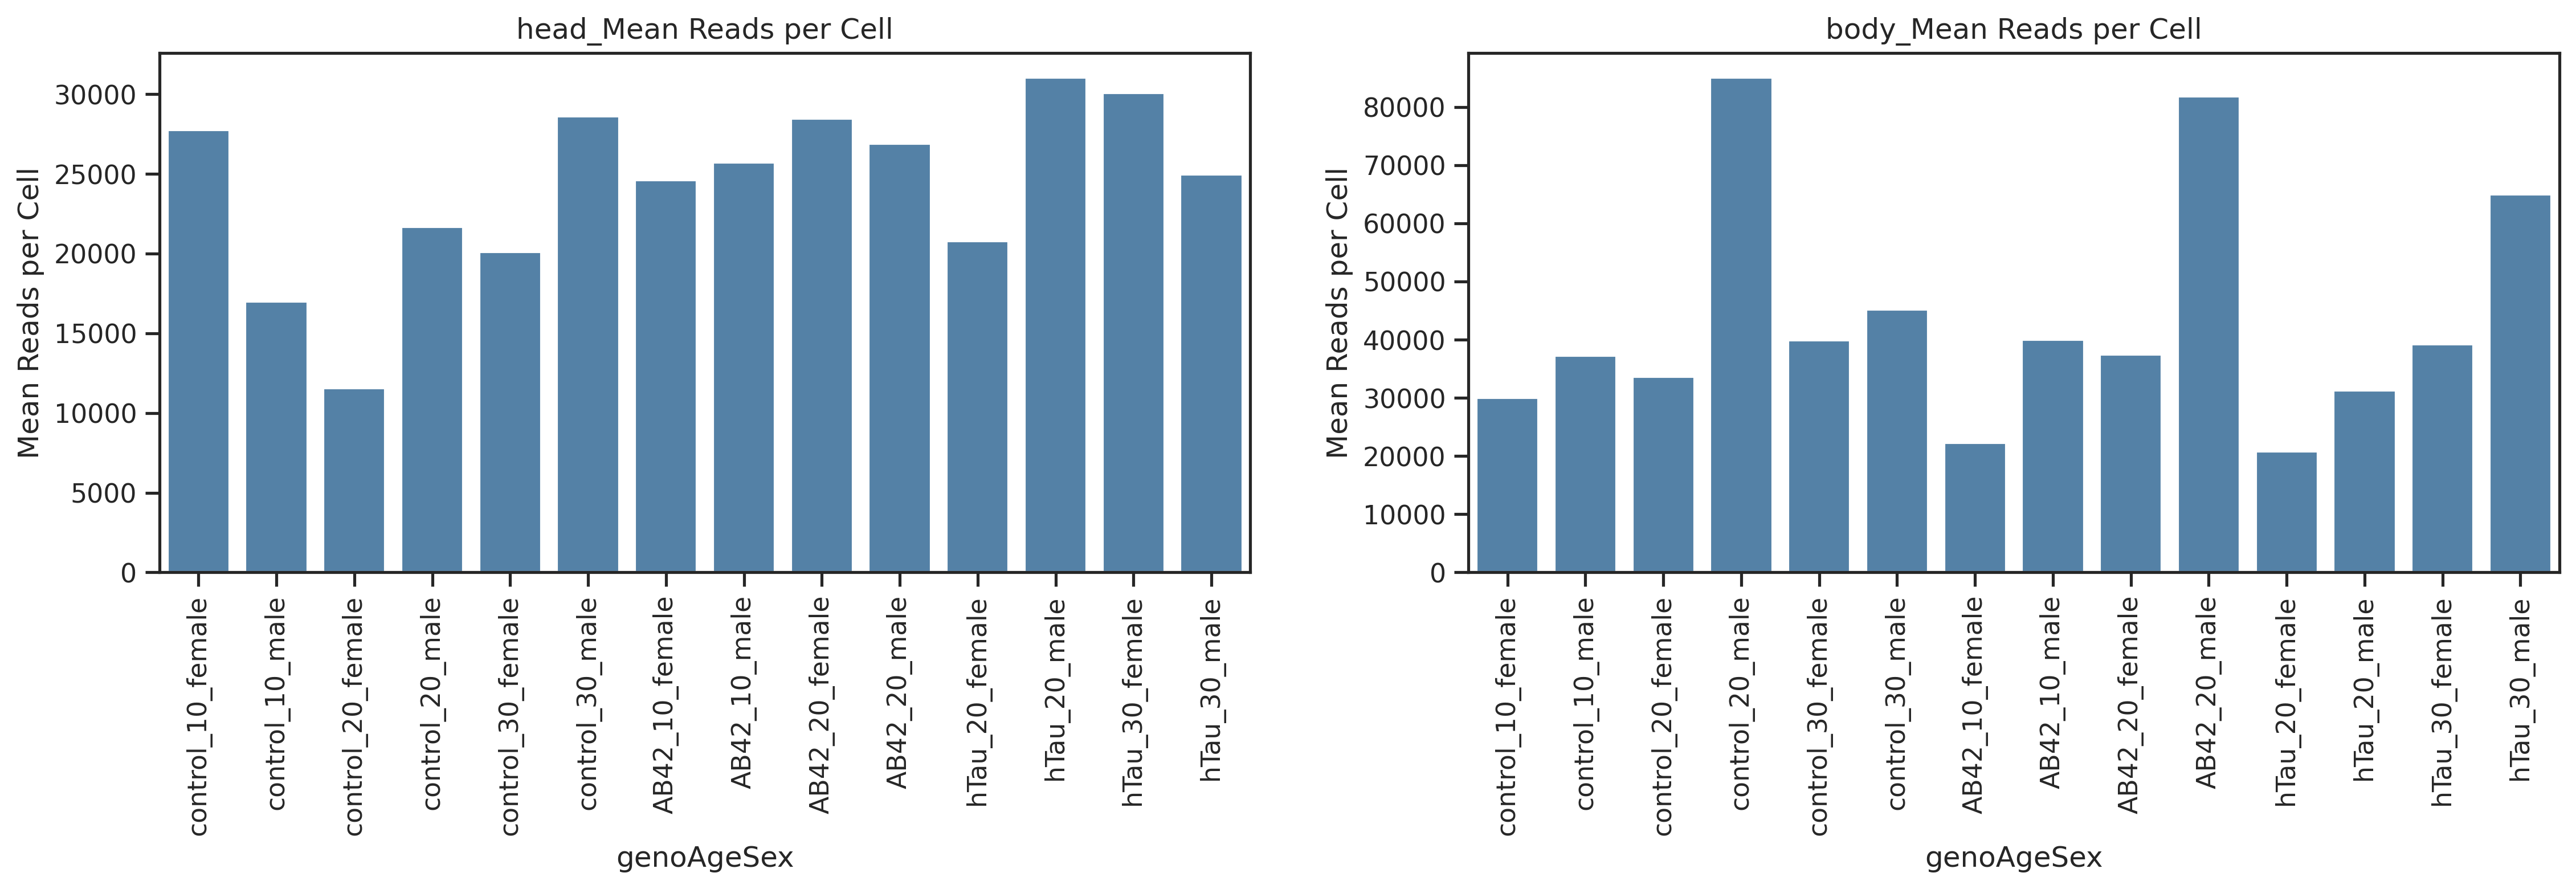

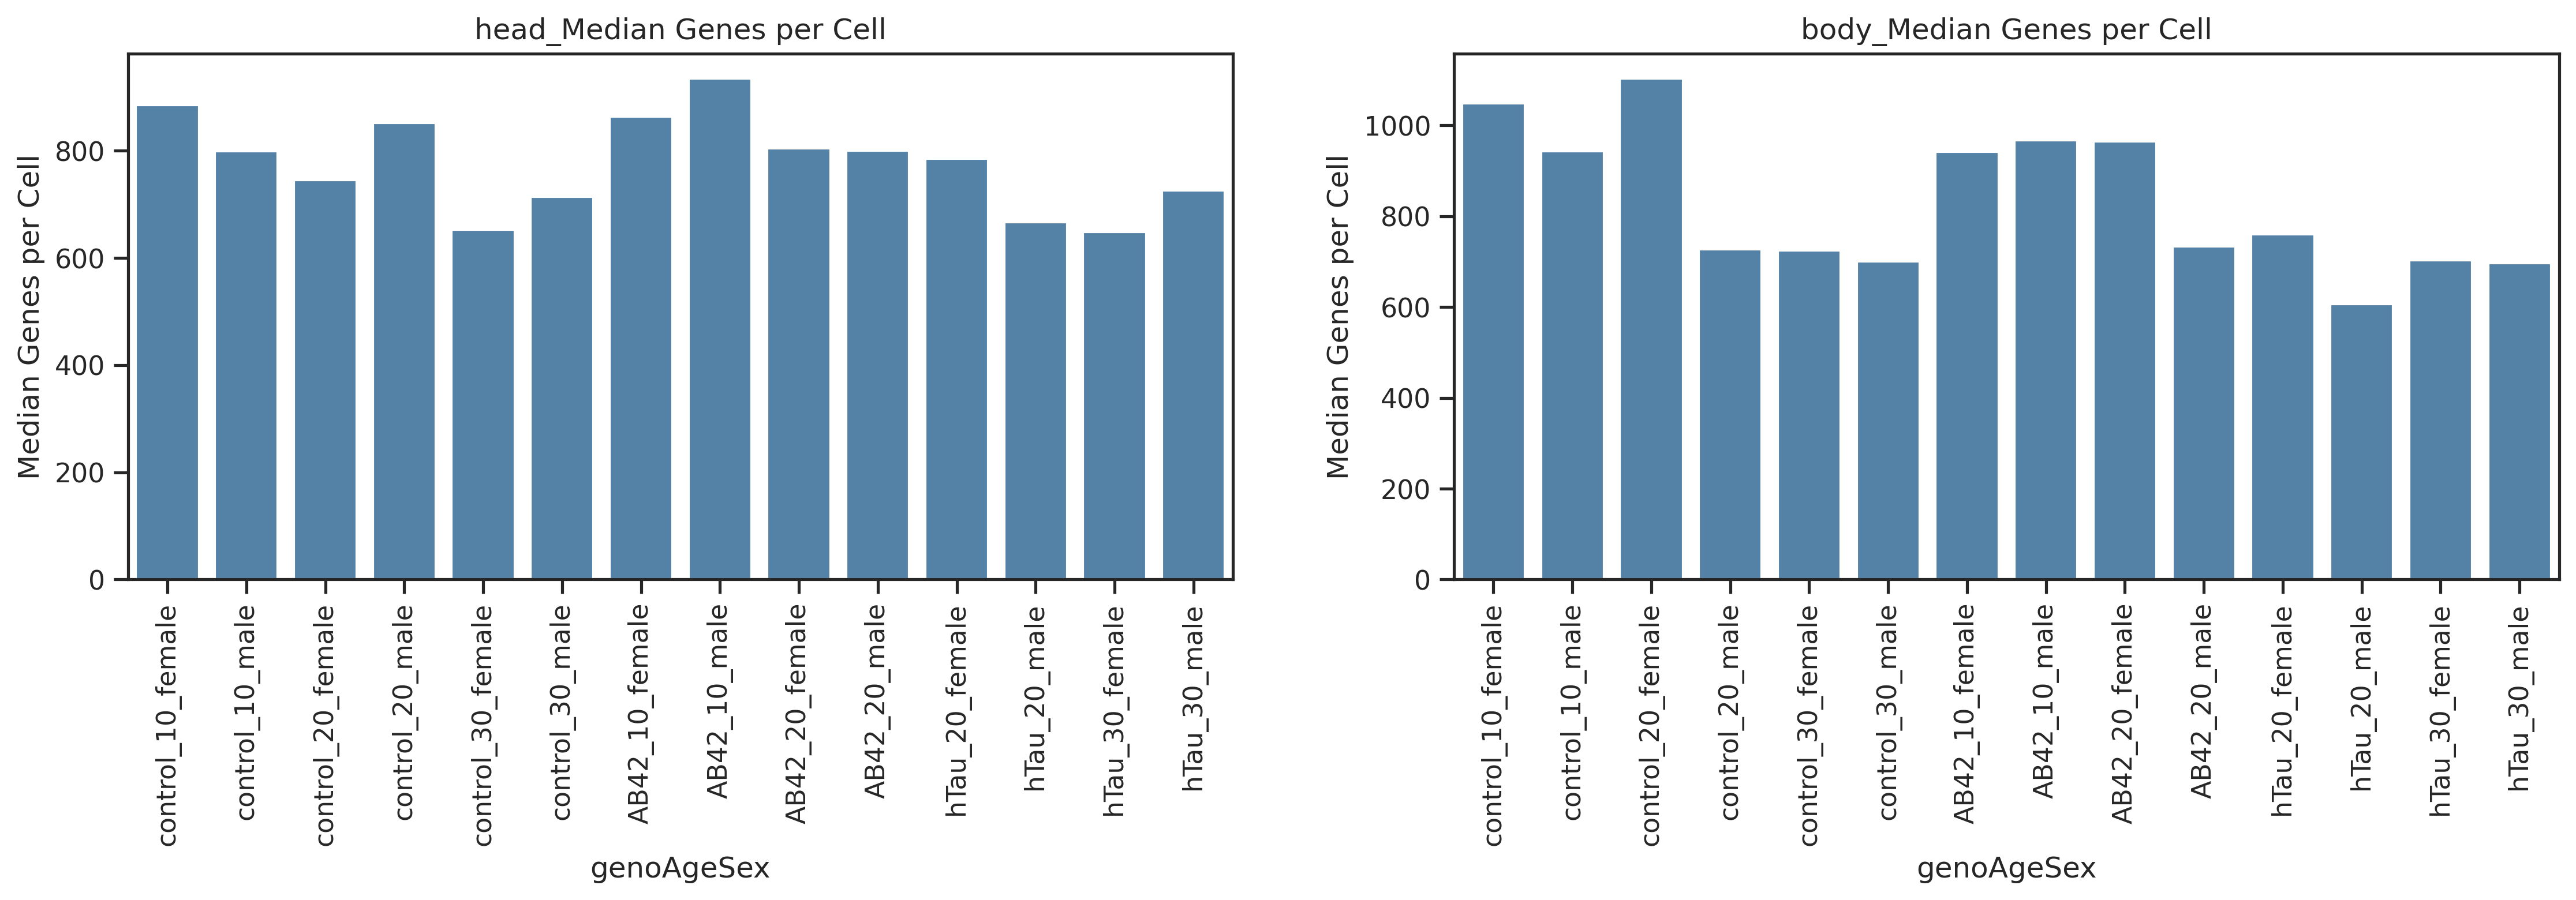

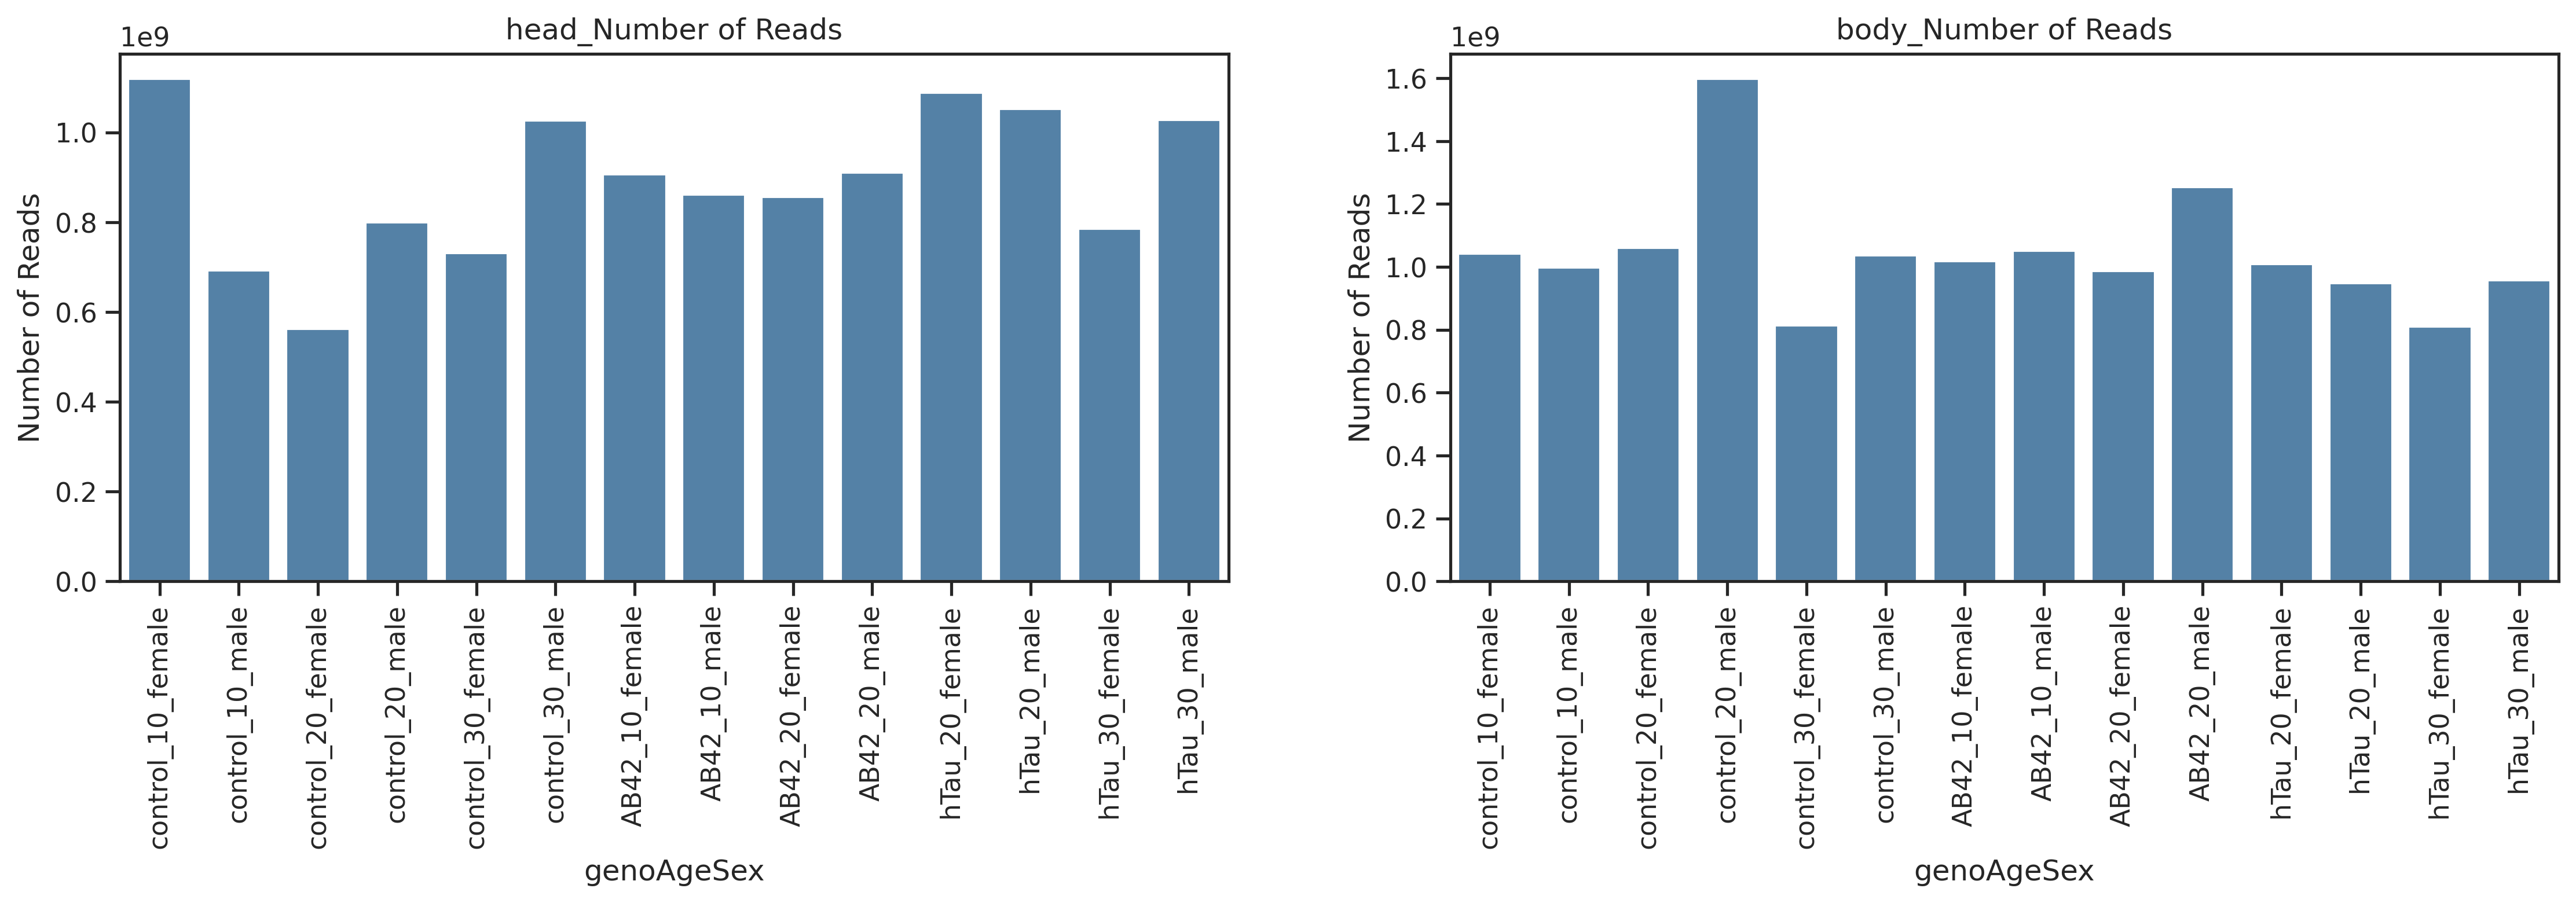

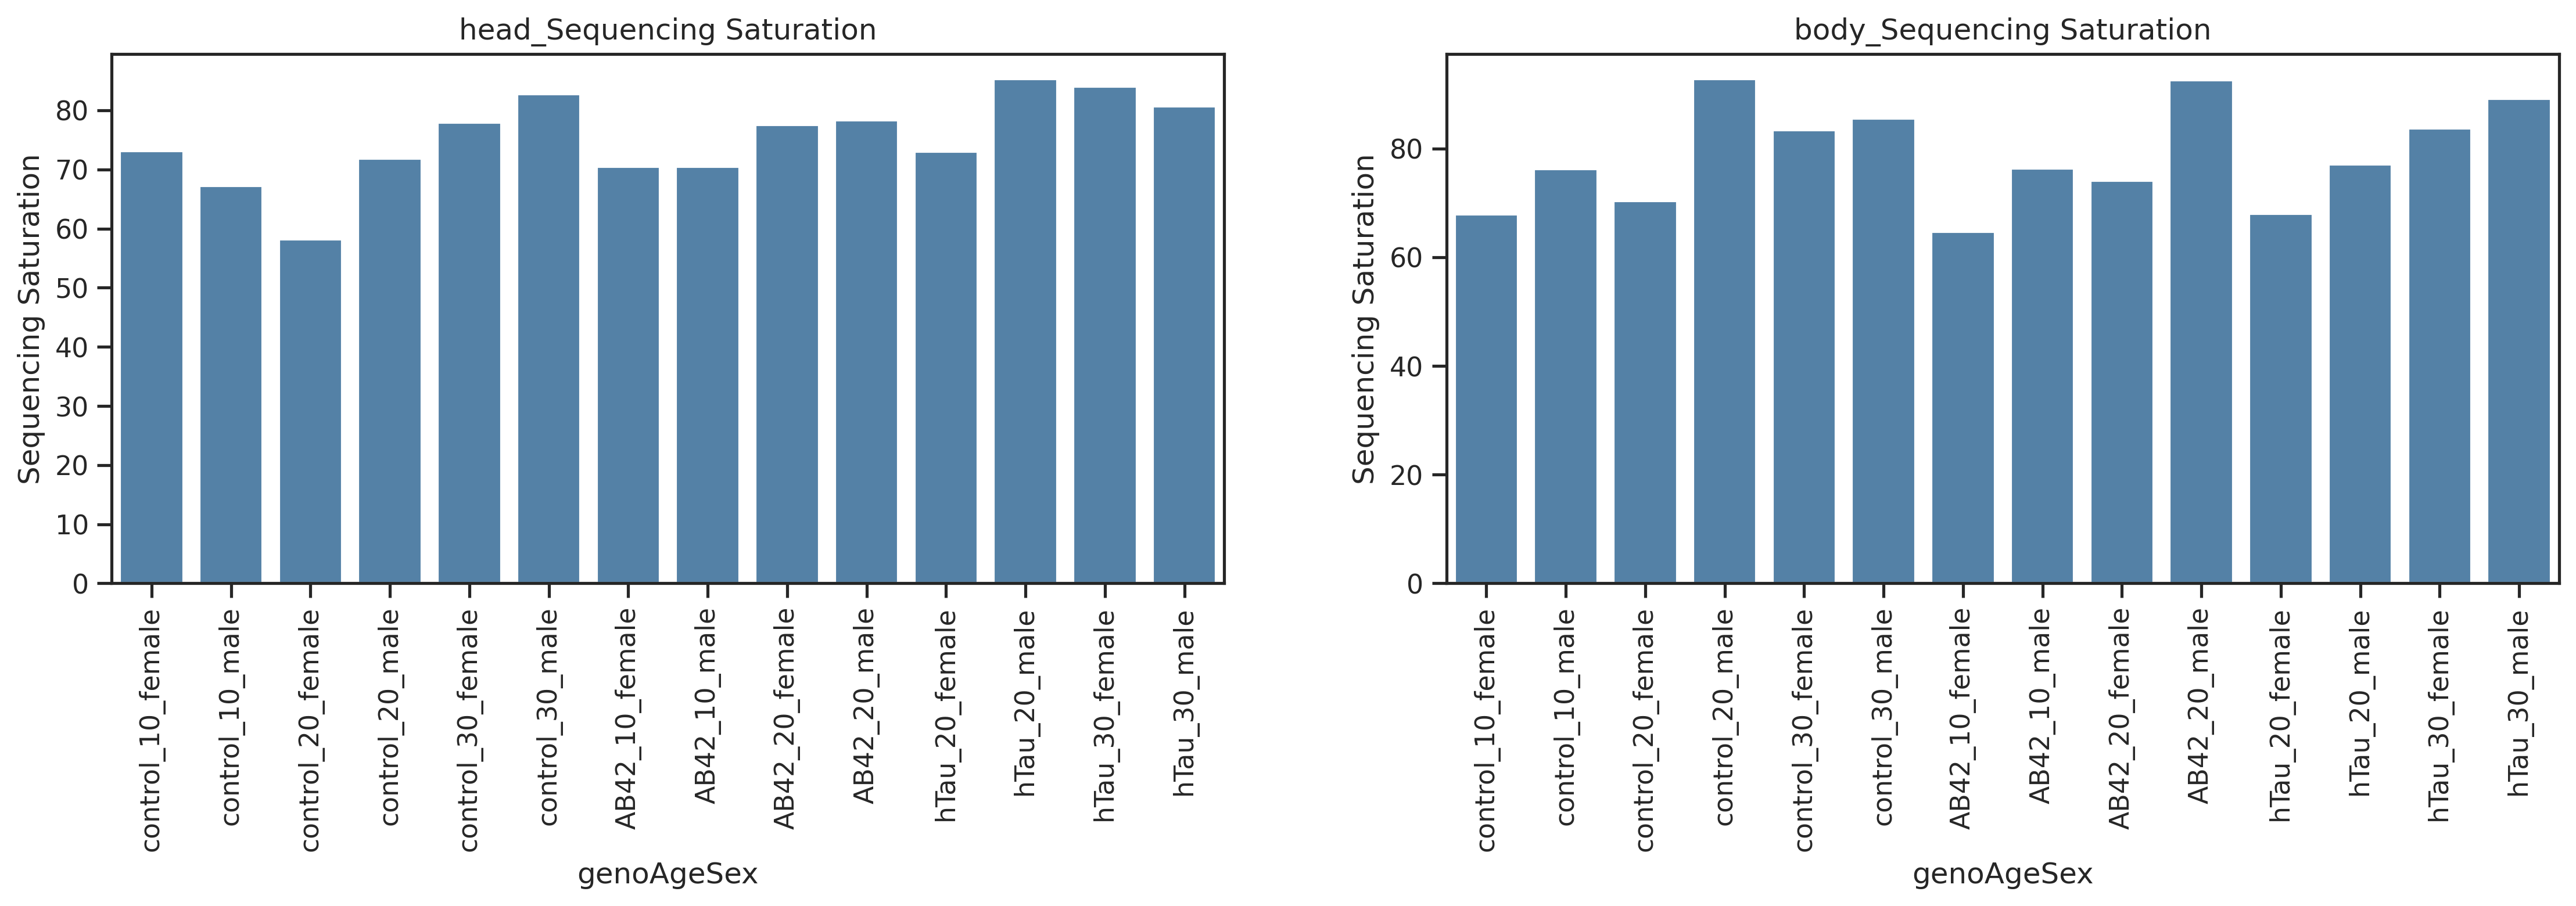

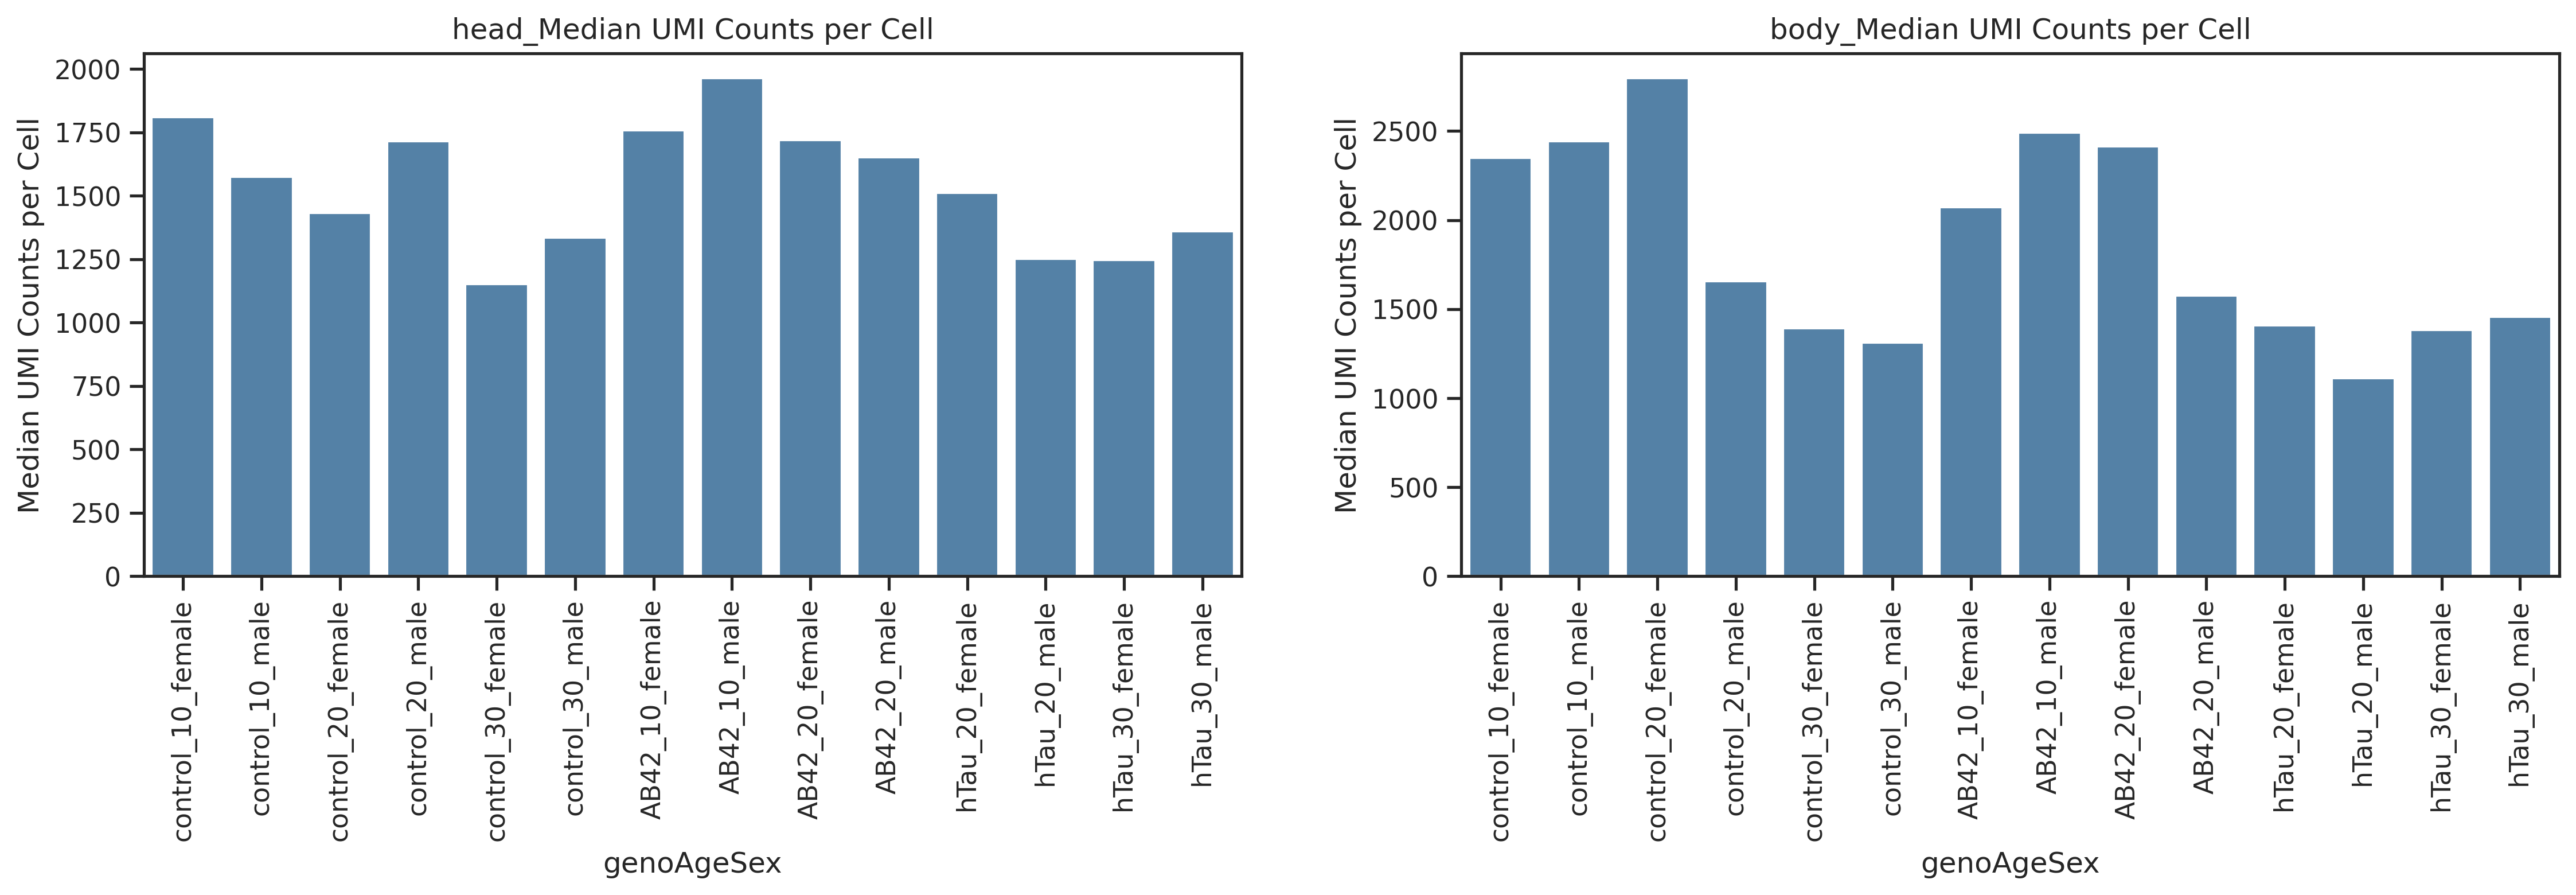

In [39]:
for feature in feature_L[:]:
    figs, axs = plt.subplots(1, 2, figsize=(18, 4))
    for n, tissue in enumerate(['head', 'body']):
        # print(feature, tissue)
        
        # sc.pl.violin(crSummary_Df[crSummary_Df.tissue == tissue], keys=feature, groupby='genoAgeSex', jitter=0.4, size=0.1, rotation=90, ax=axs[n],  show=False, )
        # sns.lineplot(data=crSummary_Df[crSummary_Df.tissue == tissue], x='genoAgeSex', y=feature, hue_order=genoAgeSex_L0, ax=axs[n])
        sns.barplot(data=crSummary_Df[crSummary_Df.tissue == tissue], x='genoAgeSex', y=feature,  ax=axs[n], color='steelblue') # hue_order=genoAgeSex_L0,
        
        # axs[0].set_xticklabels(rotation=90)
        axs[n].tick_params(axis='x', rotation=90)
        axs[n].title.set_text(f'{tissue}_{feature}')
    
    plt.savefig(f'{figure1PicFolder}/barplot__{feature}__groupbyGenoAgeSex.pdf', bbox_inches='tight')
    plt.show()

In [33]:
crSummary_Df.to_csv(f'cellrangerSummary/all_metrics_sampleTable.csv', index=False)

## Check medium gene#

In [17]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [18]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [17]:
adata_afca = sc.read('/data/tcl/Project/AFCA/adataRelease/v1.01/normalizedCounts/adata_headBody_S_v1.01.h5ad')
adata_afca

AnnData object with n_obs × n_vars = 566254 × 1885
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad'
    var: 'gene_ids'
    uns: 'afca_annotation_colors', 'age_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sex_colors', 'tissue_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [18]:
adata_headBody.obs.iloc[:,:15]

latent_RT_efficiency  \
TTCGCTGTCCCAAGCG-1_11_D20CEFH-0              1.632454   
CTCAATTAGACCACGA-1_11_D20CEFH-0              1.660071   
GCTACCTTCACCCTCA-1_11_D20CEFH-0              1.954348   
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0              1.628265   
ATTGTTCTCAGTCATG-1_11_D20CEFH-0              1.493281   
...                                               ...   
GAGTTGTCACATTCGA-1_8_D10ABFB-1               0.477179   
GAAGCGACAGTTACCA-1_8_D10ABFB-1               0.557848   
AGCGTCGTCCATGATG-1_8_D10ABFB-1               0.445145   
CACAGGCGTCTGTGTA-1_8_D10ABFB-1               0.715374   
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1               0.539586   

                                 latent_cell_probability  latent_scale  \
TTCGCTGTCCCAAGCG-1_11_D20CEFH-0                 0.999480   1554.837524   
CTCAATTAGACCACGA-1_11_D20CEFH-0                 0.999592   1568.089233   
GCTACCTTCACCCTCA-1_11_D20CEFH-0                 0.999656   1626.214355   
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0                 0.999738   1579.643555   
ATTGTTCTCAGTCATG-1_11_D20CEFH-0                 0.999731   1566.443604   
...                                                  ...           ...   
GAGTTGTCACATTCGA-1_8_D10ABFB-1                  0.998440   1892.367065   
GAAGCGACAGTTACCA-1_8_D10ABFB-1                  0.997484   1925.888672   
AGCGTCGTCCATGATG-1_8_D10ABFB-1                  0.998755   1886.357910   
CACAGGCGTCTGTGTA-1_8_D10ABFB-1                  0.988256   1943.386597   
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1                  0.997514   1915.256226   

                                 n_genes dataset              cellBC     sex  \
TTCGCTGTCCCAAGCG-1_11_D20CEFH-0     1033   ADFCA  TTCGCTGTCCCAAGCG-1  female   
CTCAATTAGACCACGA-1_11_D20CEFH-0     1043   ADFCA  CTCAATTAGACCACGA-1  female   
GCTACCTTCACCCTCA-1_11_D20CEFH-0     1034   ADFCA  GCTACCTTCACCCTCA-1  female   
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0     1150   ADFCA  AGGGTGAGTGCCGTTG-1  female   
ATTGTTCTCAGTCATG-1_11_D20CEFH-0      972   ADFCA  ATTGTTCTCAGTCATG-1  female   
...                                  ...     ...                 ...     ...   
GAGTTGTCACATTCGA-1_8_D10ABFB-1       321   ADFCA  GAGTTGTCACATTCGA-1  female   
GAAGCGACAGTTACCA-1_8_D10ABFB-1       342   ADFCA  GAAGCGACAGTTACCA-1  female   
AGCGTCGTCCATGATG-1_8_D10ABFB-1       254   ADFCA  AGCGTCGTCCATGATG-1  female   
CACAGGCGTCTGTGTA-1_8_D10ABFB-1       326   ADFCA  CACAGGCGTCTGTGTA-1  female   
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1       392   ADFCA  AGCGTCGGTGGCCTCA-1  female   

                                tissue age genotype    sex_age  \
TTCGCTGTCCCAAGCG-1_11_D20CEFH-0   head  20  control  female_20   
CTCAATTAGACCACGA-1_11_D20CEFH-0   head  20  control  female_20   
GCTACCTTCACCCTCA-1_11_D20CEFH-0   head  20  control  female_20   
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0   head  20  control  female_20   
ATTGTTCTCAGTCATG-1_11_D20CEFH-0   head  20  control  female_20   
...                                ...  ..      ...        ...   
GAGTTGTCACATTCGA-1_8_D10ABFB-1    body  10     AB42  female_10   
GAAGCGACAGTTACCA-1_8_D10ABFB-1    body  10     AB42  female_10   
AGCGTCGTCCATGATG-1_8_D10ABFB-1    body  10     AB42  female_10   
CACAGGCGTCTGTGTA-1_8_D10ABFB-1    body  10     AB42  female_10   
AGCGTCGGTGGCCTCA-1_8_D10ABFB-1    body  10     AB42  female_10   

                                 n_genes_by_counts  total_counts  \
TTCGCTGTCCCAAGCG-1_11_D20CEFH-0               1033        3327.0   
CTCAATTAGACCACGA-1_11_D20CEFH-0               1043        3341.0   
GCTACCTTCACCCTCA-1_11_D20CEFH-0               1034        3293.0   
AGGGTGAGTGCCGTTG-1_11_D20CEFH-0               1150        3382.0   
ATTGTTCTCAGTCATG-1_11_D20CEFH-0                972        3360.0   
...                                            ...           ...   
GAGTTGTCACATTCGA-1_8_D10ABFB-1                 320         508.0   
GAAGCGACAGTTACCA-1_8_D10ABFB-1                 342         508.0   
AGCGTCGTCCATGATG-1_8_D10ABFB-1                 254         534.0   
CACAGGCGTCTGTGTA-1_8_D10A

In [15]:
adata_headBody.obs['dataset'] = 'ADFCA'

In [19]:
adata_afca.obs['dataset'] = pd.Categorical(['FCA' if age == '5' else 'AFCA' for age in adata_afca.obs['age'] ])

In [20]:
adata_afca.obs['dataset'].value_counts()

AFCA    369349
FCA     196905
Name: dataset, dtype: int64

In [21]:
adata_concat = adata_afca.concatenate(adata_headBody, join='outer')
adata_concat

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape),

AnnData object with n_obs × n_vars = 1190712 × 16219
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'cellBC', 'genotype', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids-0', 'gene_ids-1', 'highly_variable-0-1', 'means-0-1', 'dispersions-0-1', 'dispersions_norm-0-1', 'highly_variable-1-1', 'means-1-1', 'dispersions-1-1', 'dispersions_norm-1-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_

### Separate head and body

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

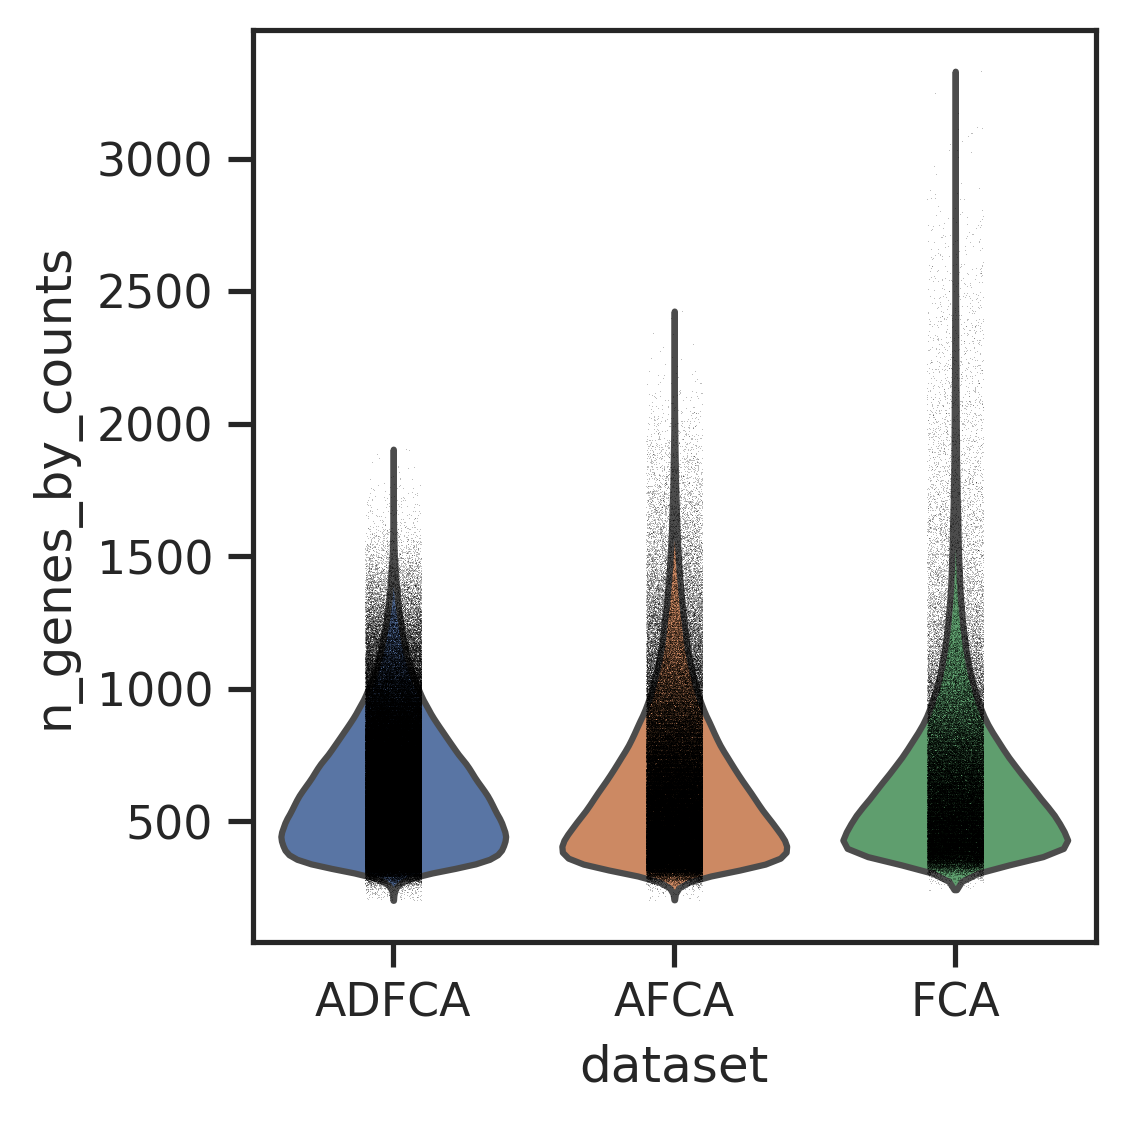

FCA median gene#:  578.0
AFCA median gene#:  569.0
ADFCA median gene#:  585.0


/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

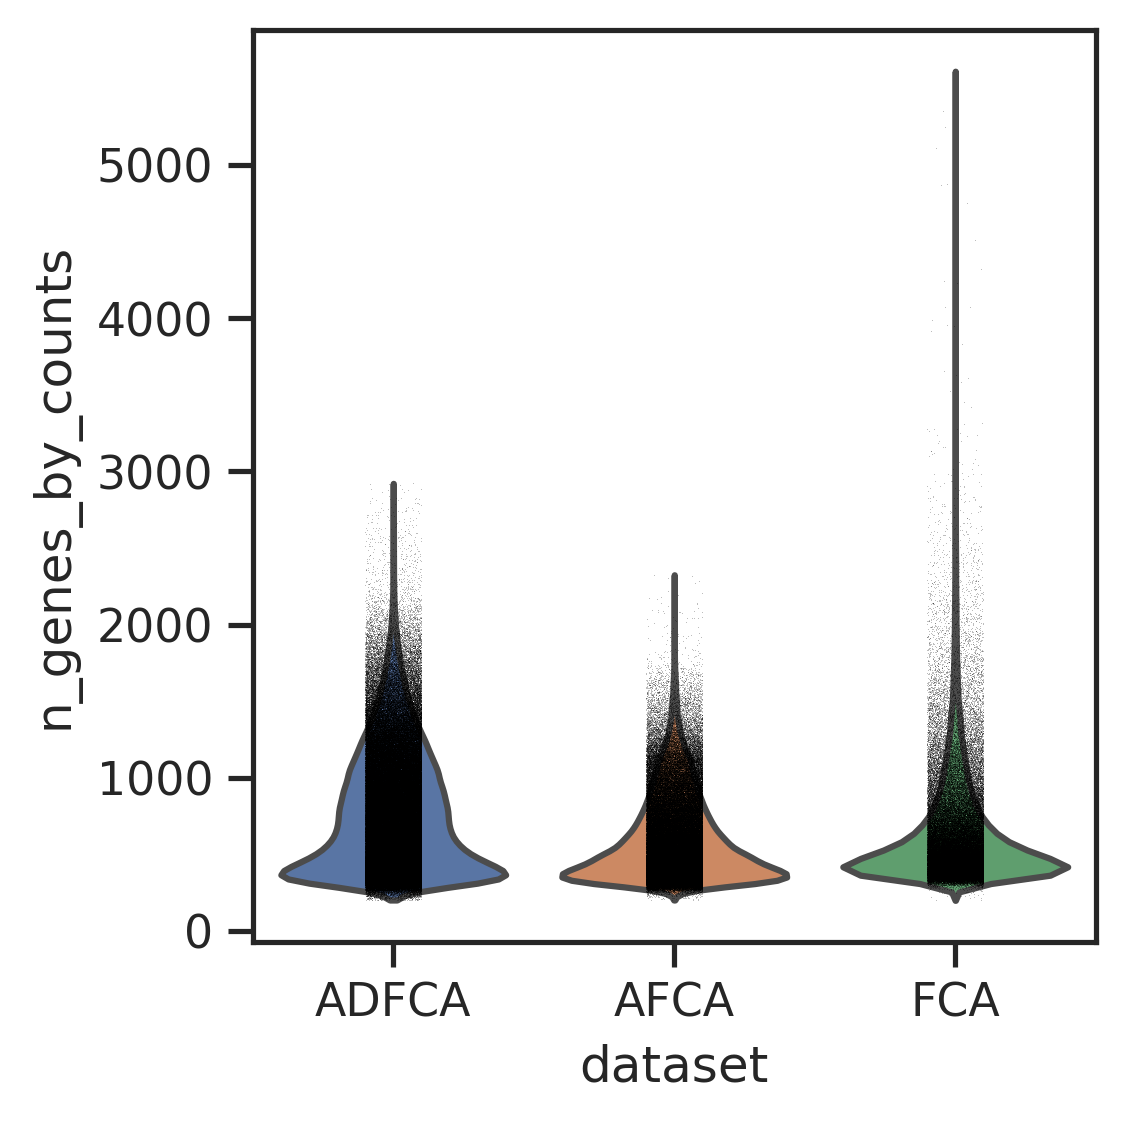

FCA median gene#:  512.0
AFCA median gene#:  518.0
ADFCA median gene#:  701.0


In [23]:
for tissue in ['head', 'body']:
    sc.pl.violin(adata_concat[adata_concat.obs.tissue == tissue], keys=['n_genes_by_counts'], groupby='dataset', size=0.1, jitter=0.1)
    print('FCA median gene#: ', np.median(adata_afca[ (adata_afca.obs.dataset == 'FCA') & (adata_afca.obs.tissue == tissue) ].obs.n_genes_by_counts))
    print('AFCA median gene#: ', np.median(adata_afca[ (adata_afca.obs.dataset == 'AFCA') & (adata_afca.obs.tissue == tissue)  ].obs.n_genes_by_counts))
    print('ADFCA median gene#: ', np.median(adata_headBody[adata_headBody.obs.tissue == tissue].obs.n_genes_by_counts))

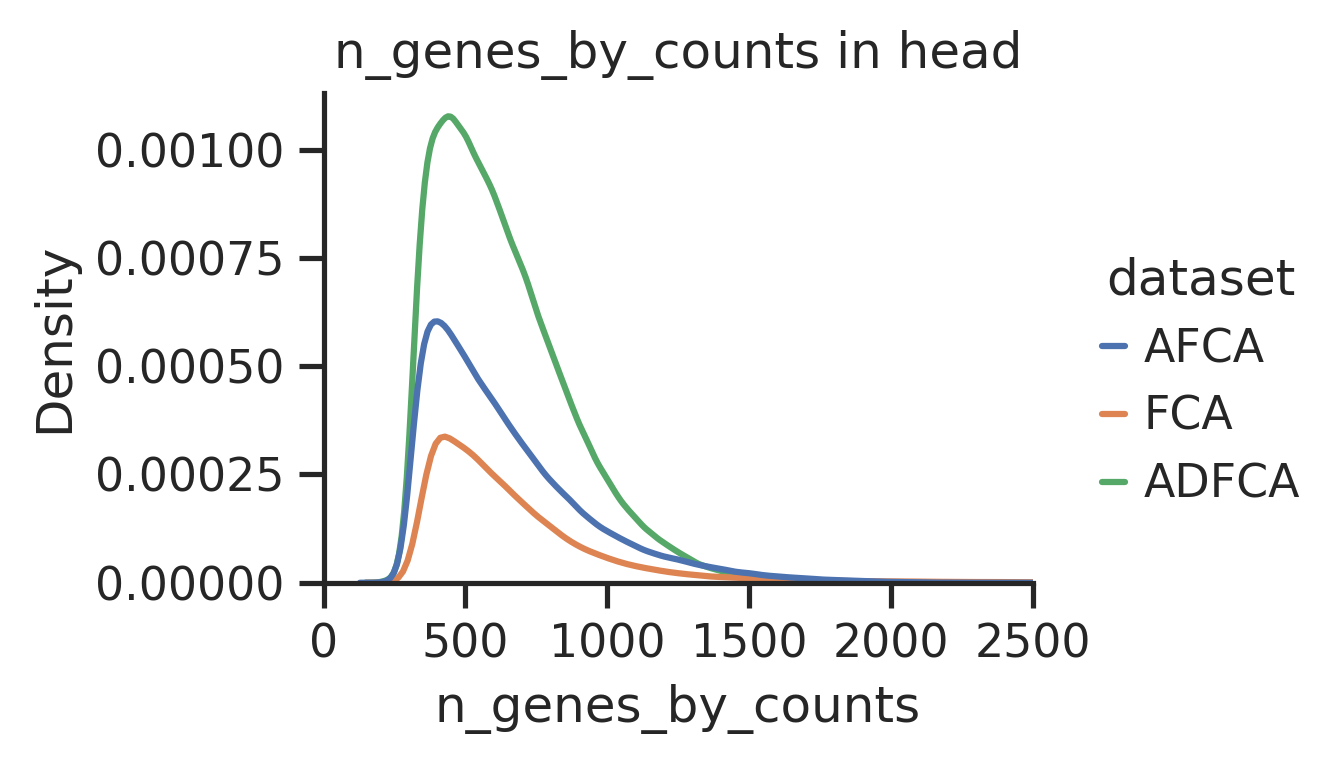

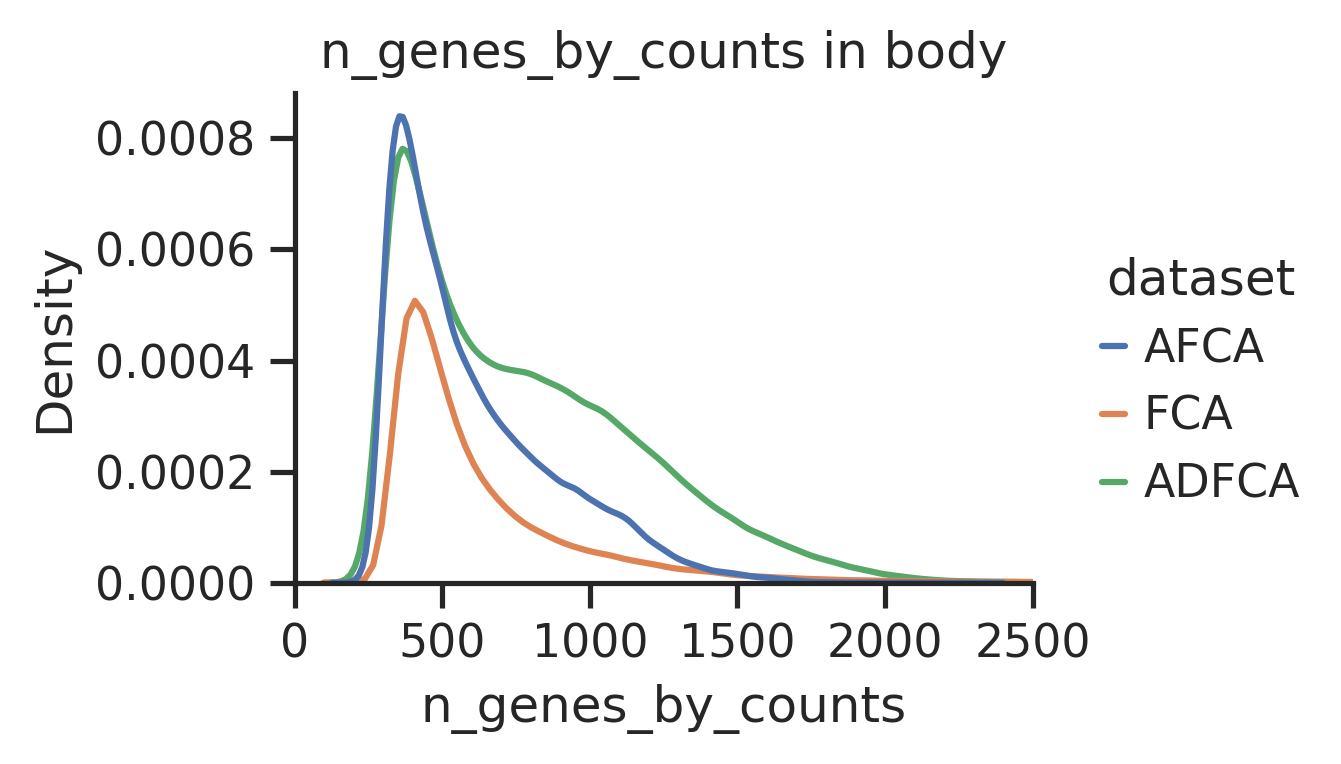

In [24]:
# figs, axs = plt.subplots(1, 2, figsize = )
for tissue in ['head', 'body']:
    sns.displot(data=adata_concat[adata_concat.obs.tissue == tissue].obs, 
                x="n_genes_by_counts", kind="kde", hue='dataset', height=2.5, aspect=1.5)
    plt.title(f'n_genes_by_counts in {tissue}')
    plt.xlim(0, 2500)
    
    plt.savefig(f'{figure1PicFolder}/n_genes_by_counts__datasets__{tissue}.pdf', bbox_inches='tight')

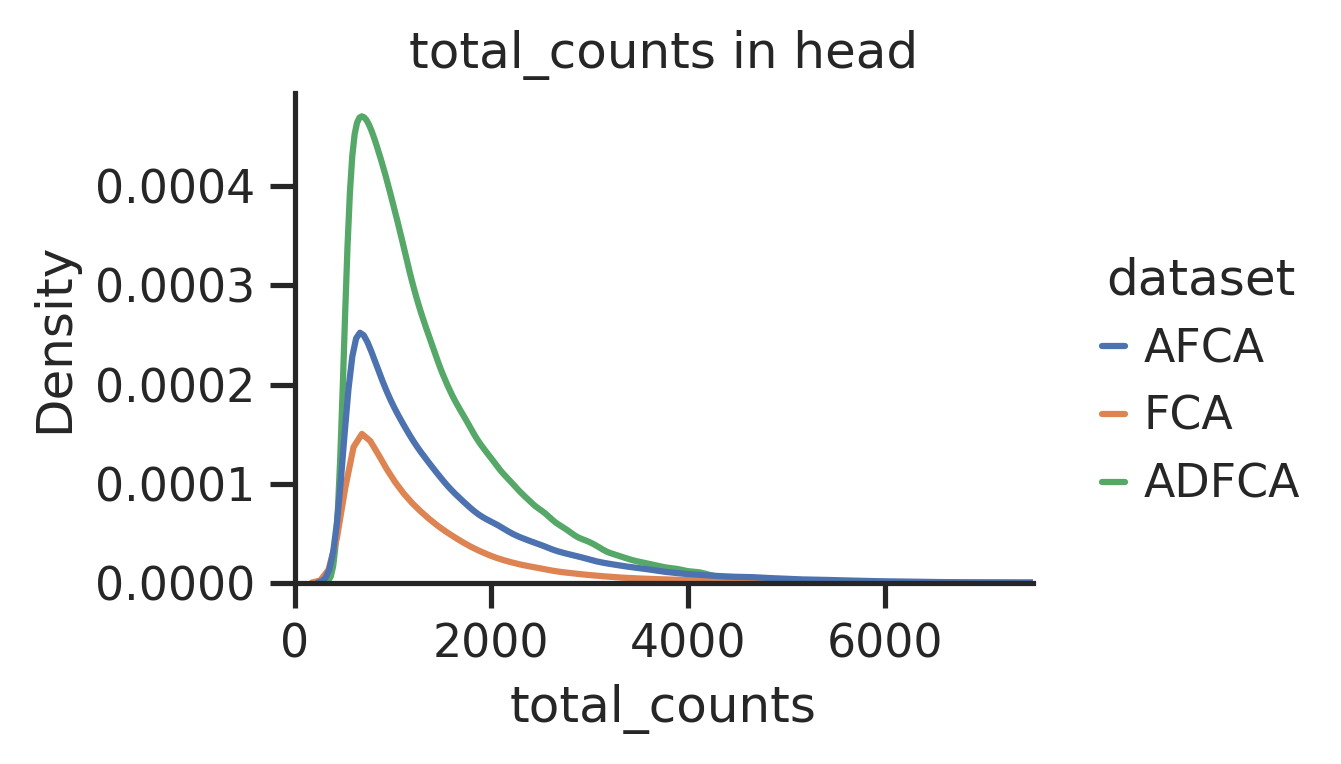

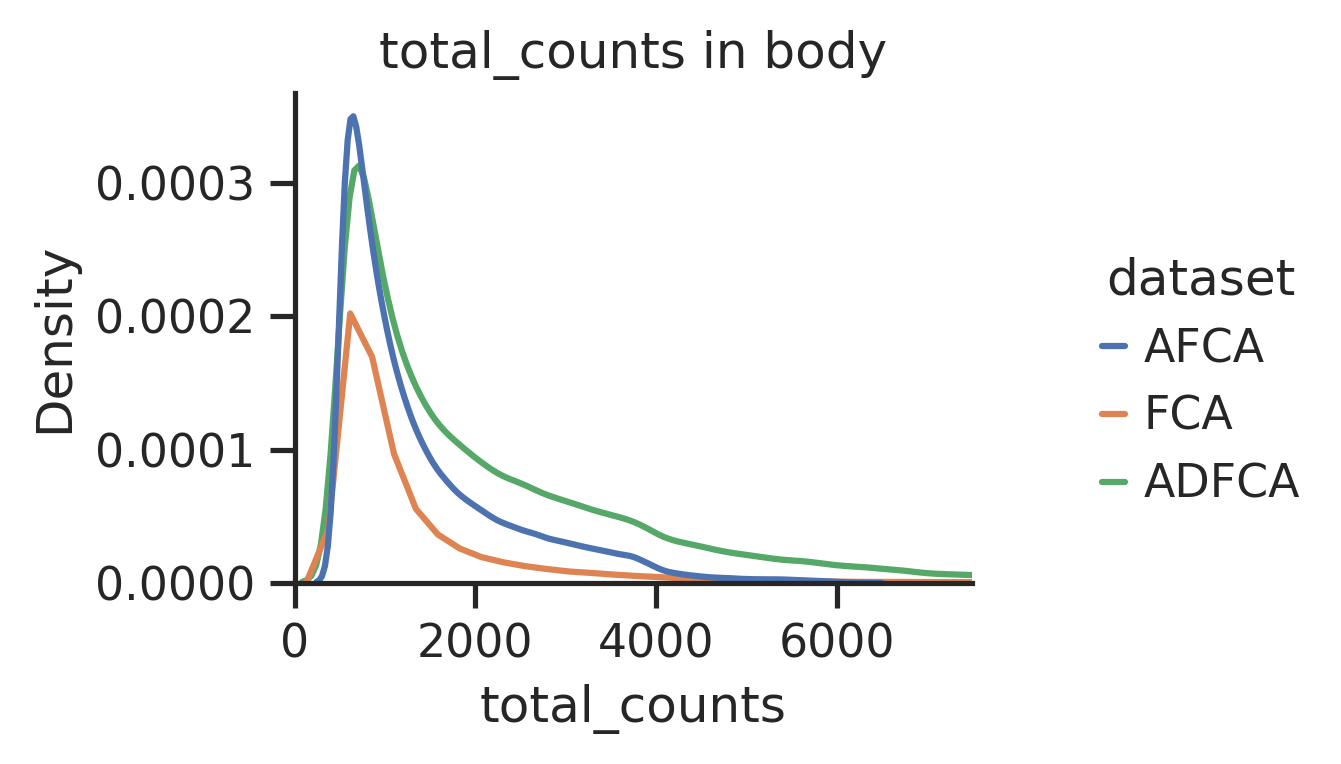

In [25]:
# figs, axs = plt.subplots(1, 2, figsize = (6, 2.5))
for n, tissue in enumerate(['head', 'body']):
    sns.displot(data=adata_concat[adata_concat.obs.tissue == tissue].obs, 
                x="total_counts", kind="kde", hue='dataset', height=2.5, aspect=1.5)
    plt.title(f'total_counts in {tissue}')
    plt.xlim(0, 7500)
    plt.savefig(f'{figure1PicFolder}/total_counts__datasets__{tissue}.pdf', bbox_inches='tight')

In [26]:
df = pd.DataFrame(adata_concat.obs.groupby('dataset').size(), columns=['Total cell number'])
df.index = df.index.to_list()
df['dataset'] = df.index.to_list()
df

Total cell number dataset
ADFCA             624458   ADFCA
AFCA              369349    AFCA
FCA               196905     FCA

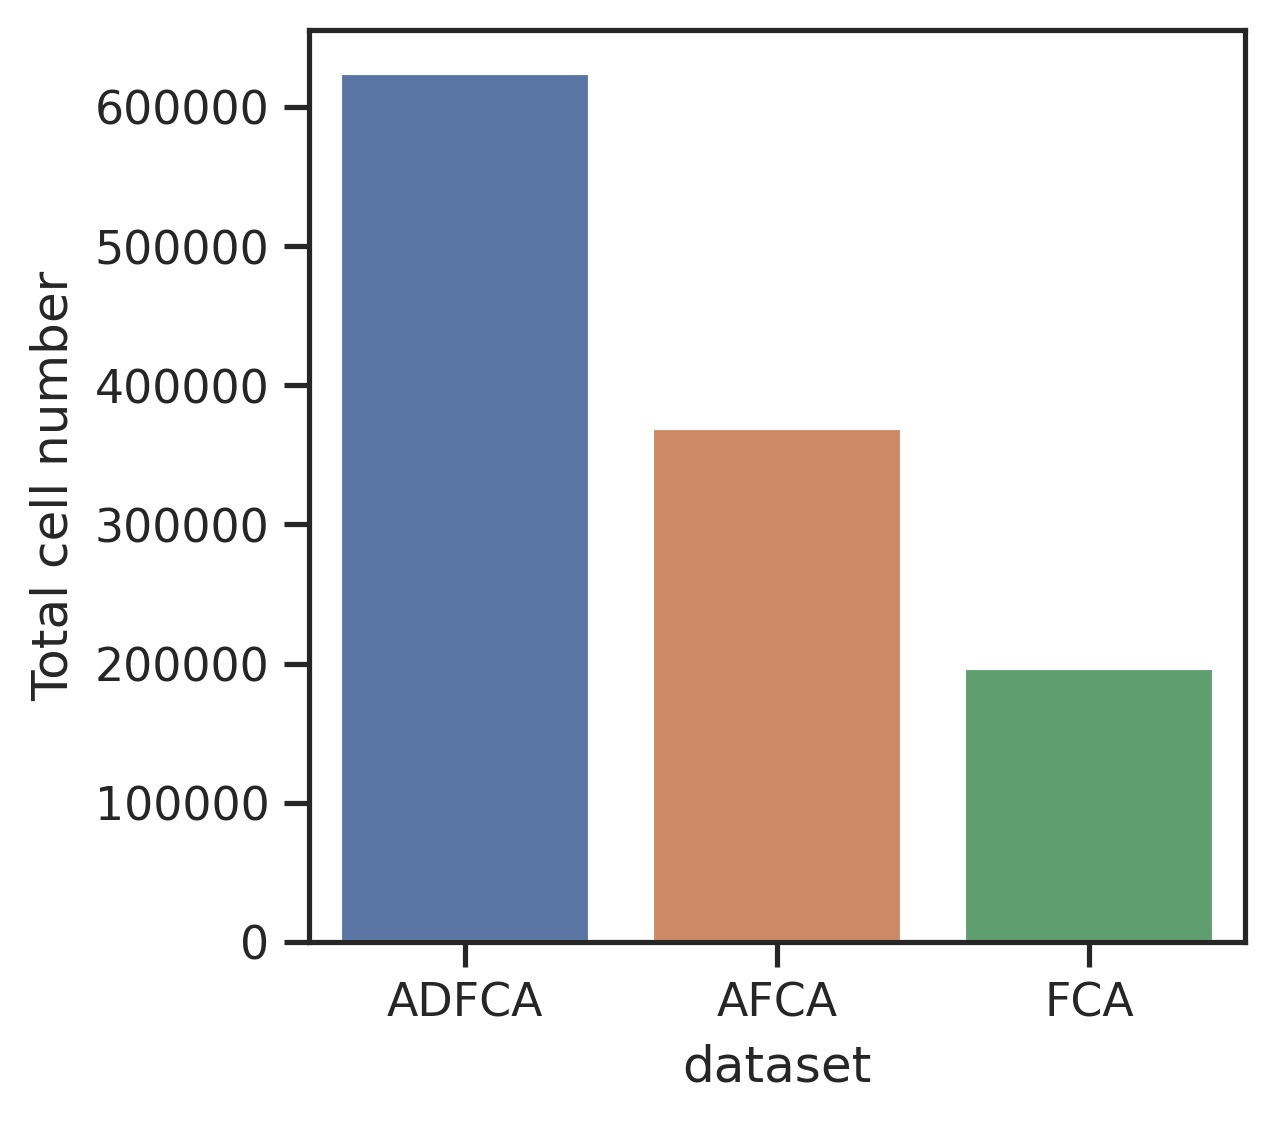

In [27]:
sns.barplot(data=df, 
            x="dataset", y='Total cell number',)
plt.savefig(f'{figure1PicFolder}/cellN_dataset.pdf', bbox_inches='tight')

# Finish